In [64]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [65]:
df=pd.read_csv("Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [66]:
# first five row of dataset
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [69]:
# view the statistics of data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [70]:
# checking of missing value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling of Missing Value

In [71]:
n=df['Item_Weight'].mean()
n

12.857645184136183

In [72]:
df['Item_Weight'].fillna(n,inplace=True)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

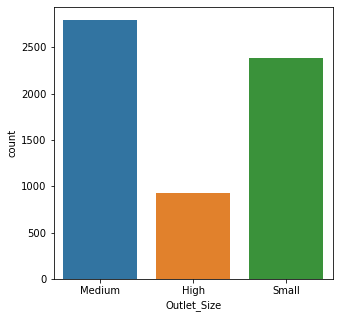

In [73]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size',data=df)

In [74]:
p=df['Outlet_Size'].mode()
p

0    Medium
dtype: object

In [75]:
df['Outlet_Size'].fillna(p[0],inplace=True)

In [76]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data correction for Item_Fat_Content

In [77]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [78]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [79]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## EDA

In [80]:
## distribution of item_weight

[]

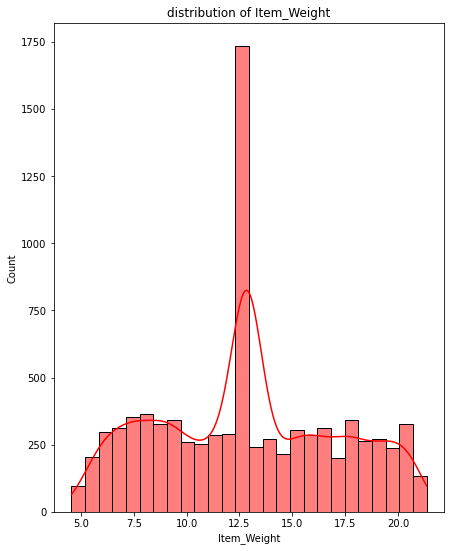

In [81]:
plt.figure(figsize=(7,9))
plt.title('distribution of Item_Weight')
sns.histplot(x='Item_Weight',data=df,kde=True,color='Red')
plt.plot()

## From the above plot lot of item have weight 12.5

<function matplotlib.pyplot.show(close=None, block=None)>

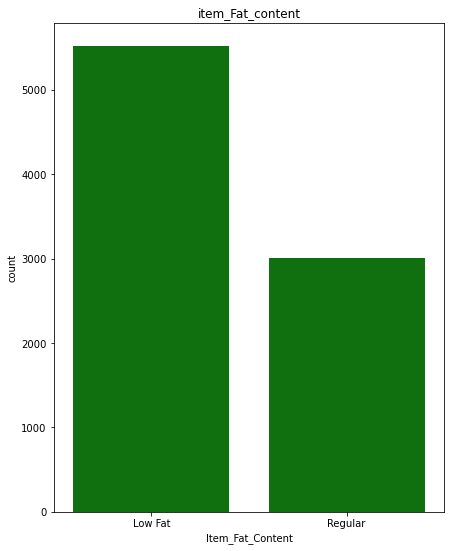

In [82]:
## counts of items on the basis of item_fat_content
plt.figure(figsize=(7,9))
plt.title('item_Fat_content')
sns.countplot(x='Item_Fat_Content',data=df,color='green')
plt.show


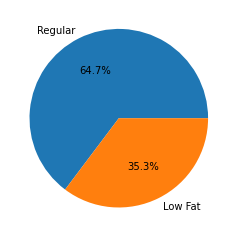

In [83]:
plt.figure(figsize=(4,5))
plt.pie(x=df['Item_Fat_Content'].value_counts(),labels={'Regular','Low Fat'},autopct='%0.1f%%')
plt.show()

## From above two plot we have low fat catogery item more than that of regular and 
## Regular=35.3%
## Low Fat=64.7%

In [84]:
## distribution of item_visibility

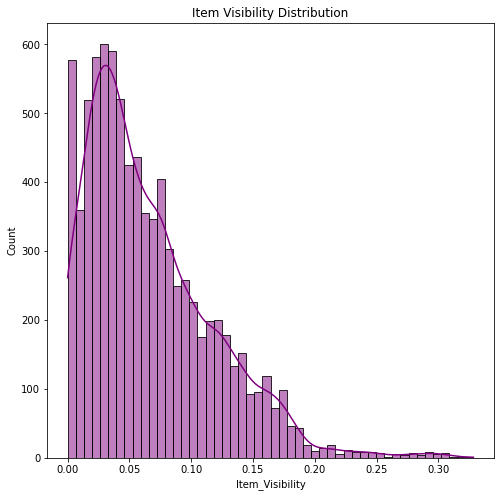

In [85]:
plt.figure(figsize=(8,8))
plt.title("Item Visibility Distribution")
sns.histplot( x='Item_Visibility',data=df, kde=True,color = 'purple')
plt.show()

## From the plot the max item has visibility is approx 0.04 and majority of item has visibility less than 0.20

In [86]:
##distribution of item type

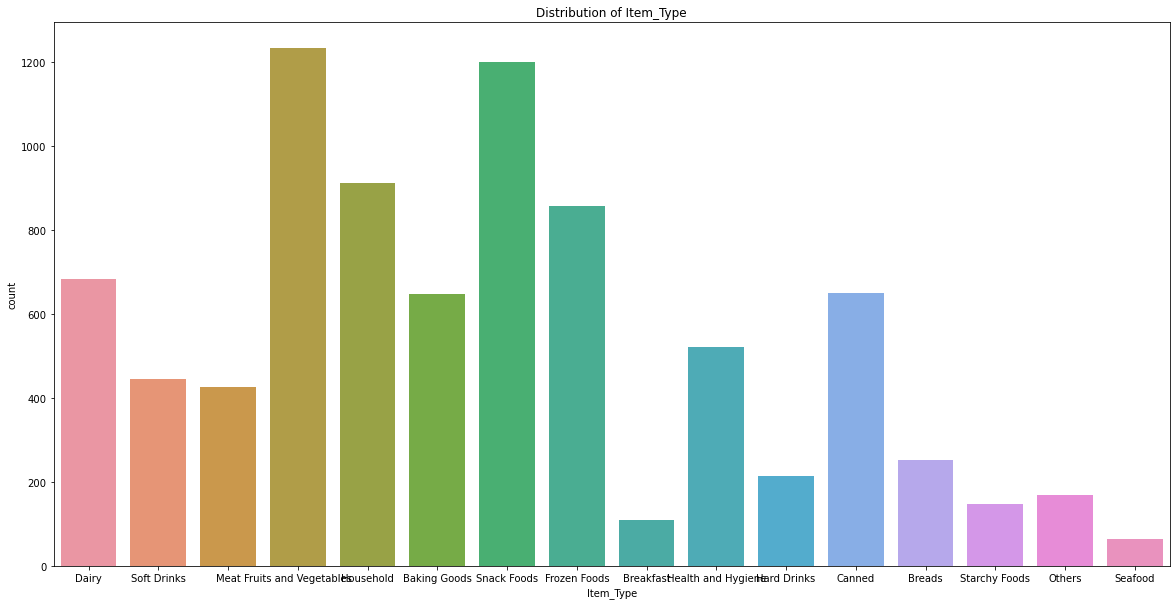

In [87]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Item_Type')
sns.countplot(x='Item_Type',data=df)
plt.show()

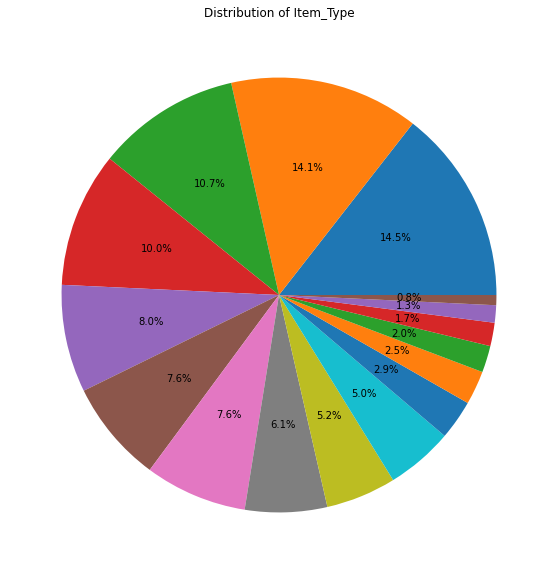

In [88]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Item_Type')
plt.pie(x=df['Item_Type'].value_counts(),autopct='%0.1f%%')
plt.show()

## Fruit and vegetables is most used item

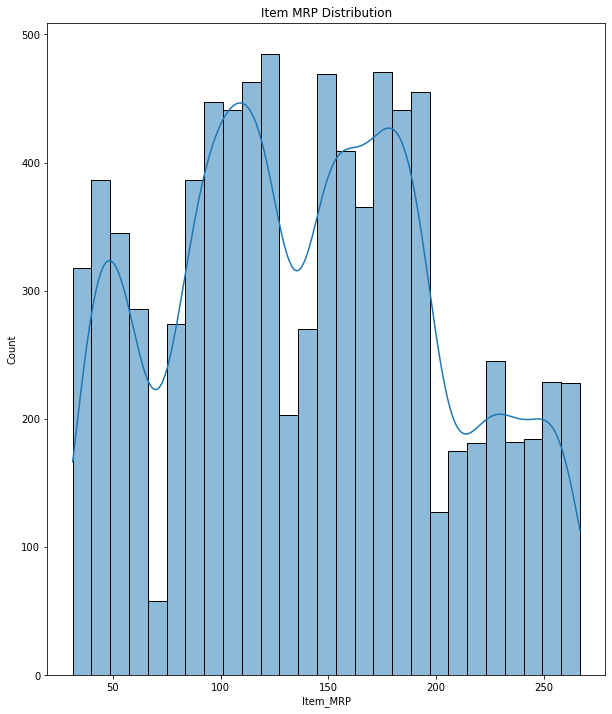

In [89]:
# distribution of Item MRP
plt.figure(figsize=(10,12))
plt.title("Item MRP Distribution")
sns.histplot(x='Item_MRP',data=df ,kde=True)
plt.show()

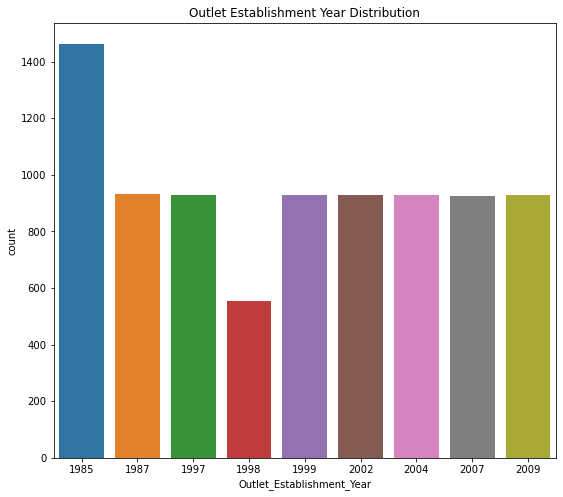

In [90]:
# distribution of Outlet Establishment Year
plt.figure(figsize=(9,8))
plt.title("Outlet Establishment Year Distribution")
sns.countplot( x='Outlet_Establishment_Year',data=df)
plt.show()

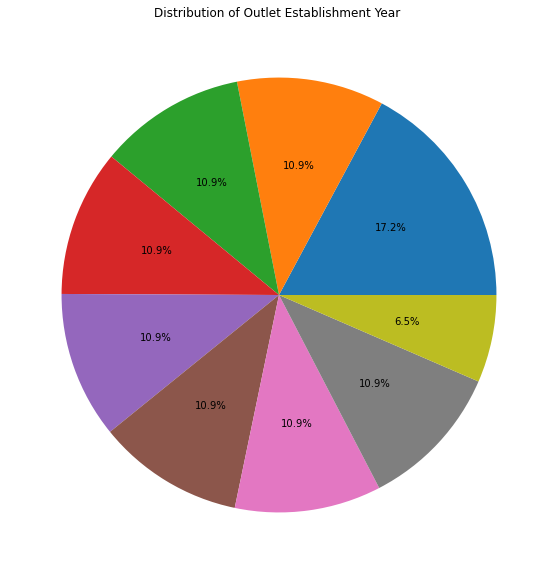

In [91]:
# pie plot for Outlet Establishment Year
plt.figure(figsize=(20,10))
plt.title('Distribution of Outlet Establishment Year ')
plt.pie(x=df['Outlet_Establishment_Year'].value_counts(),autopct='%0.1f%%')
plt.show()

## 

## More thab 1400 outlet were established in 1985

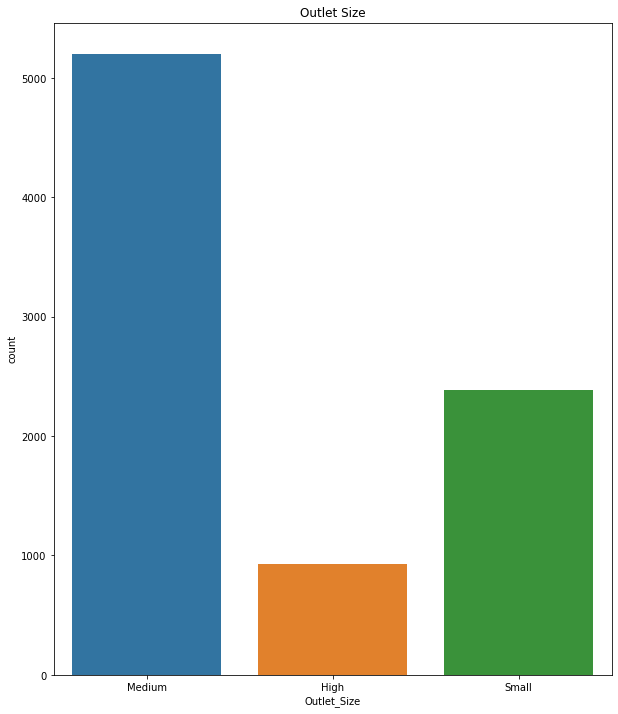

In [92]:
#Distribution of Outlet Size
plt.figure(figsize=(10,12))
plt.title("Outlet Size")
sns.countplot( x='Outlet_Size',data=df)
plt.show()


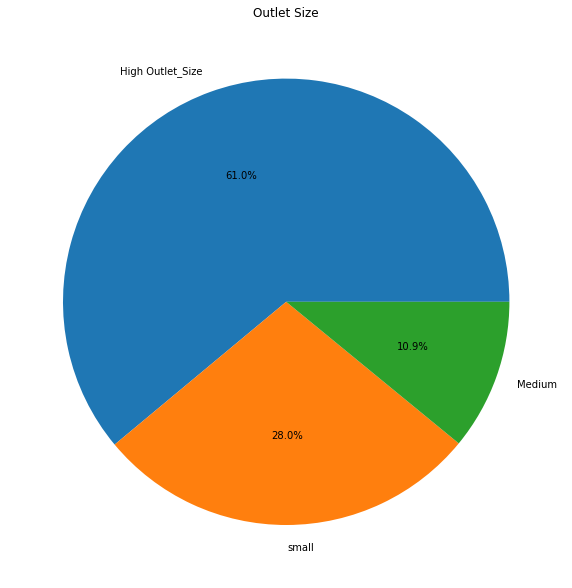

In [93]:
#pie plot of  outlet size
plt.figure(figsize=(10,12))
plt.title("Outlet Size")
plt.pie( df['Outlet_Size'].value_counts(),labels={'small','Medium','High Outlet_Size'},autopct='%0.1f%%')
plt.show()


## Most of the outlet are of medium size

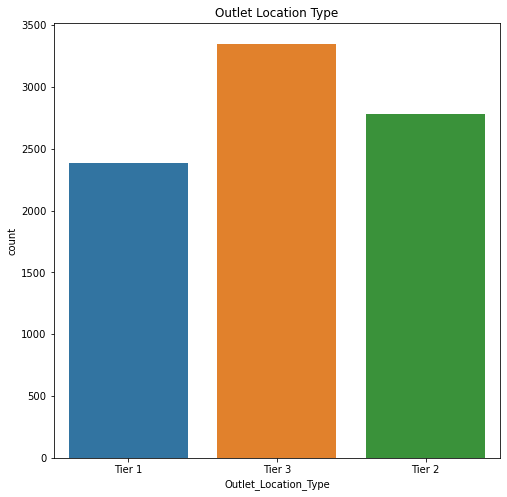

In [94]:
# Distribution of Outlet Location Type
plt.figure(figsize=(8,8))
plt.title("Outlet Location Type")
sns.countplot( x='Outlet_Location_Type',data=df)
plt.show()

## Major outlets are in Tier 3 locactions

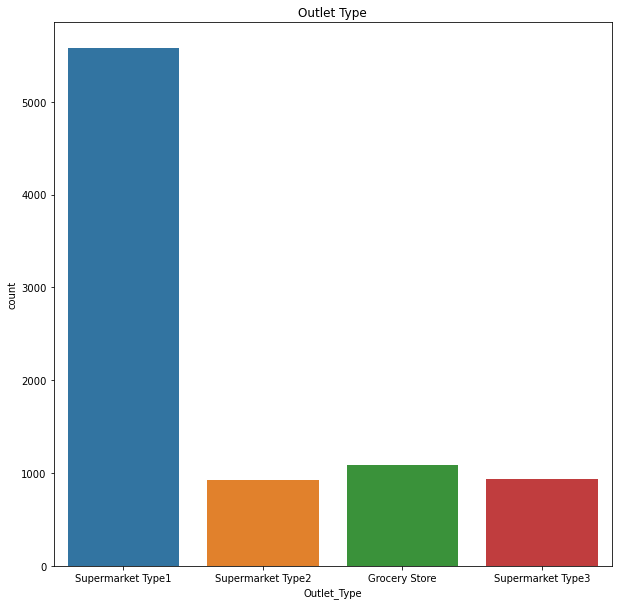

In [95]:
#distribution of Outlet Type
plt.figure(figsize=(10,10))
plt.title("Outlet Type")
sns.countplot( x='Outlet_Type',data=df)
plt.show()

##  Majority of item Belong to Supermarket Type 1

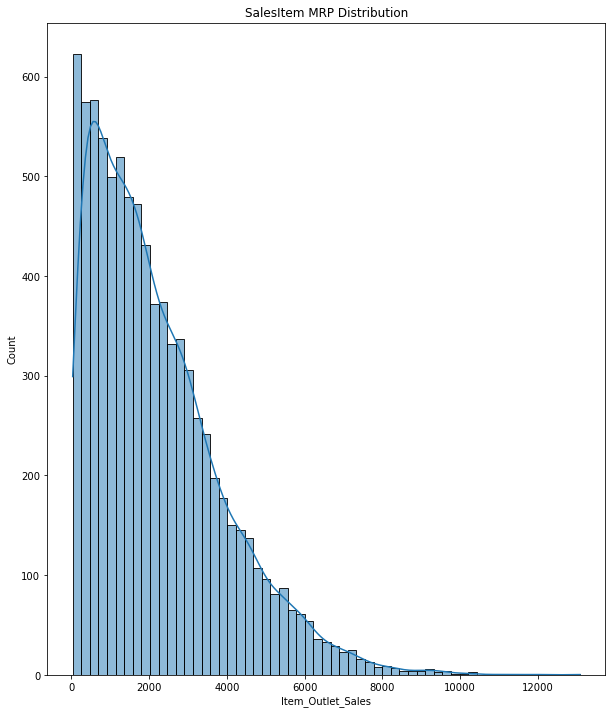

In [96]:
# distribution of sales
plt.figure(figsize=(10,12))
plt.title("SalesItem MRP Distribution")
sns.histplot(x='Item_Outlet_Sales',data=df, kde=True)
plt.show()

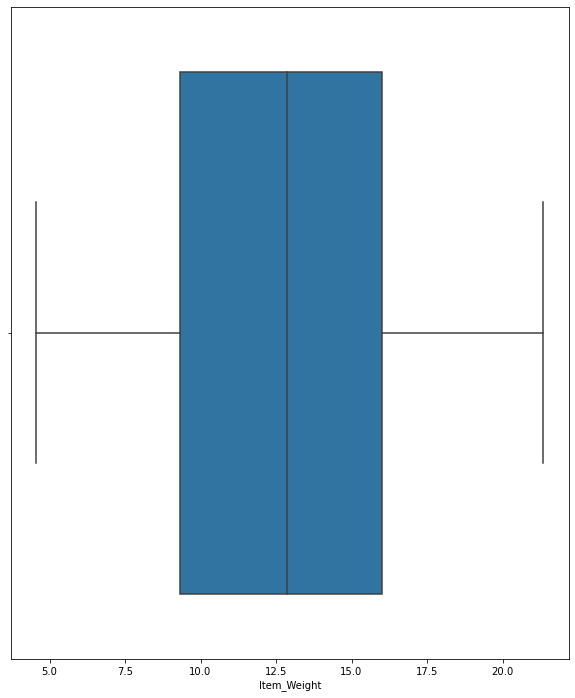

In [97]:
plt.figure(figsize=(10,12))
sns.boxplot(x='Item_Weight',data=df)
plt.show()


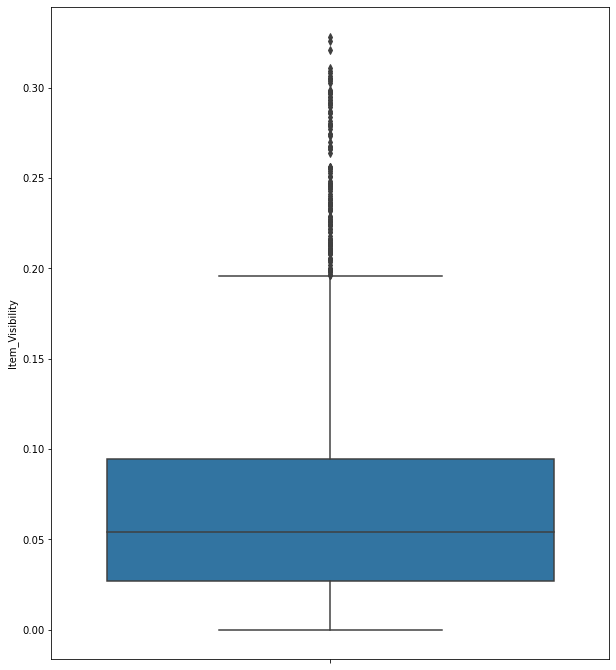

In [98]:
plt.figure(figsize=(10,12))
sns.boxplot(y='Item_Visibility',data=df)
plt.show()

## There are many outlier many outliers in Item_Visibility

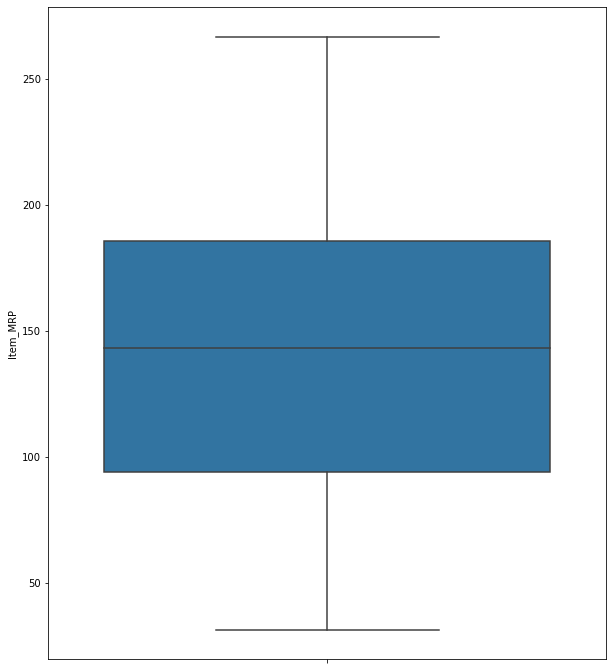

In [99]:
plt.figure(figsize=(10,12))
sns.boxplot(y='Item_MRP',data=df)
plt.show()

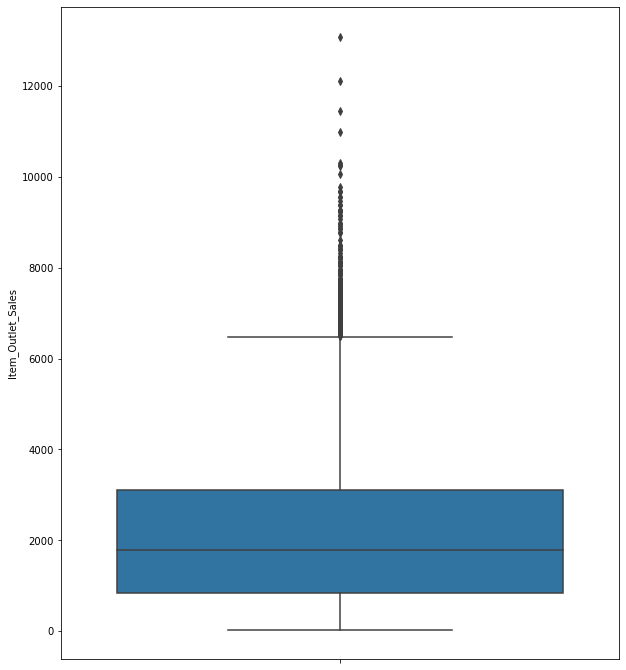

In [100]:
plt.figure(figsize=(10,12))
sns.boxplot(y='Item_Outlet_Sales',data=df)
plt.show()

## In Item_Outlet_Sales there are many outliers

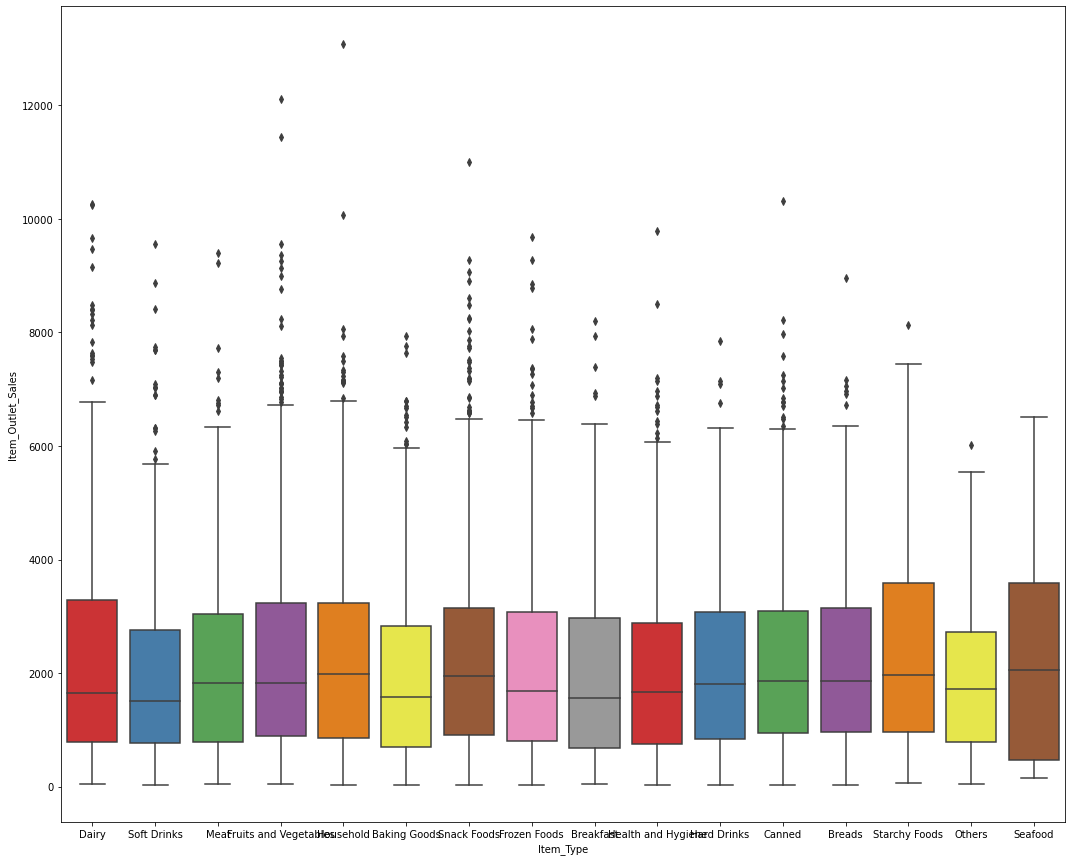

In [101]:
plt.figure(figsize = (18,15))
ax=sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette="Set1")
plt.show()

## comparision plot

<Figure size 1440x1440 with 0 Axes>

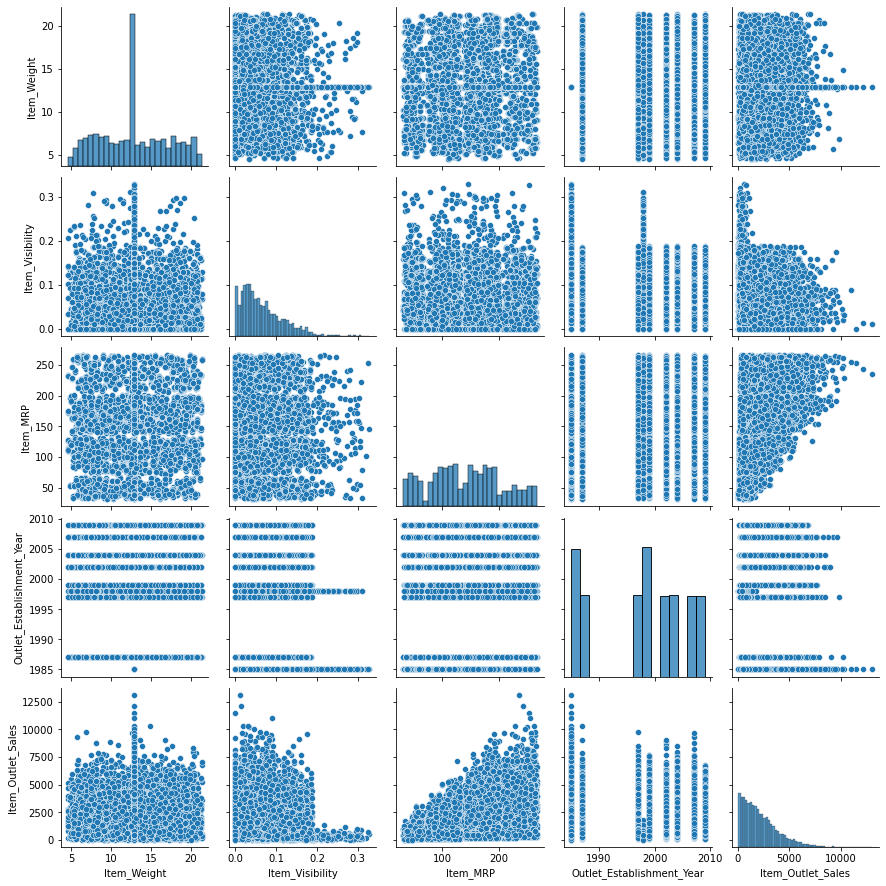

In [102]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

<AxesSubplot:>

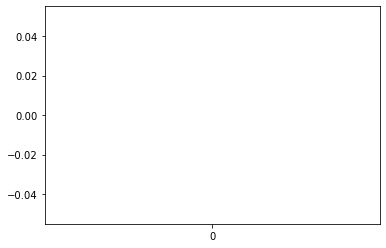

In [103]:
sns.barplot()

## label Encoding

In [104]:
for i in df.columns:
    if df[i].dtype=='object':
        label_encoding=LabelEncoder()
        df[i]=label_encoding.fit_transform(df[i])
    

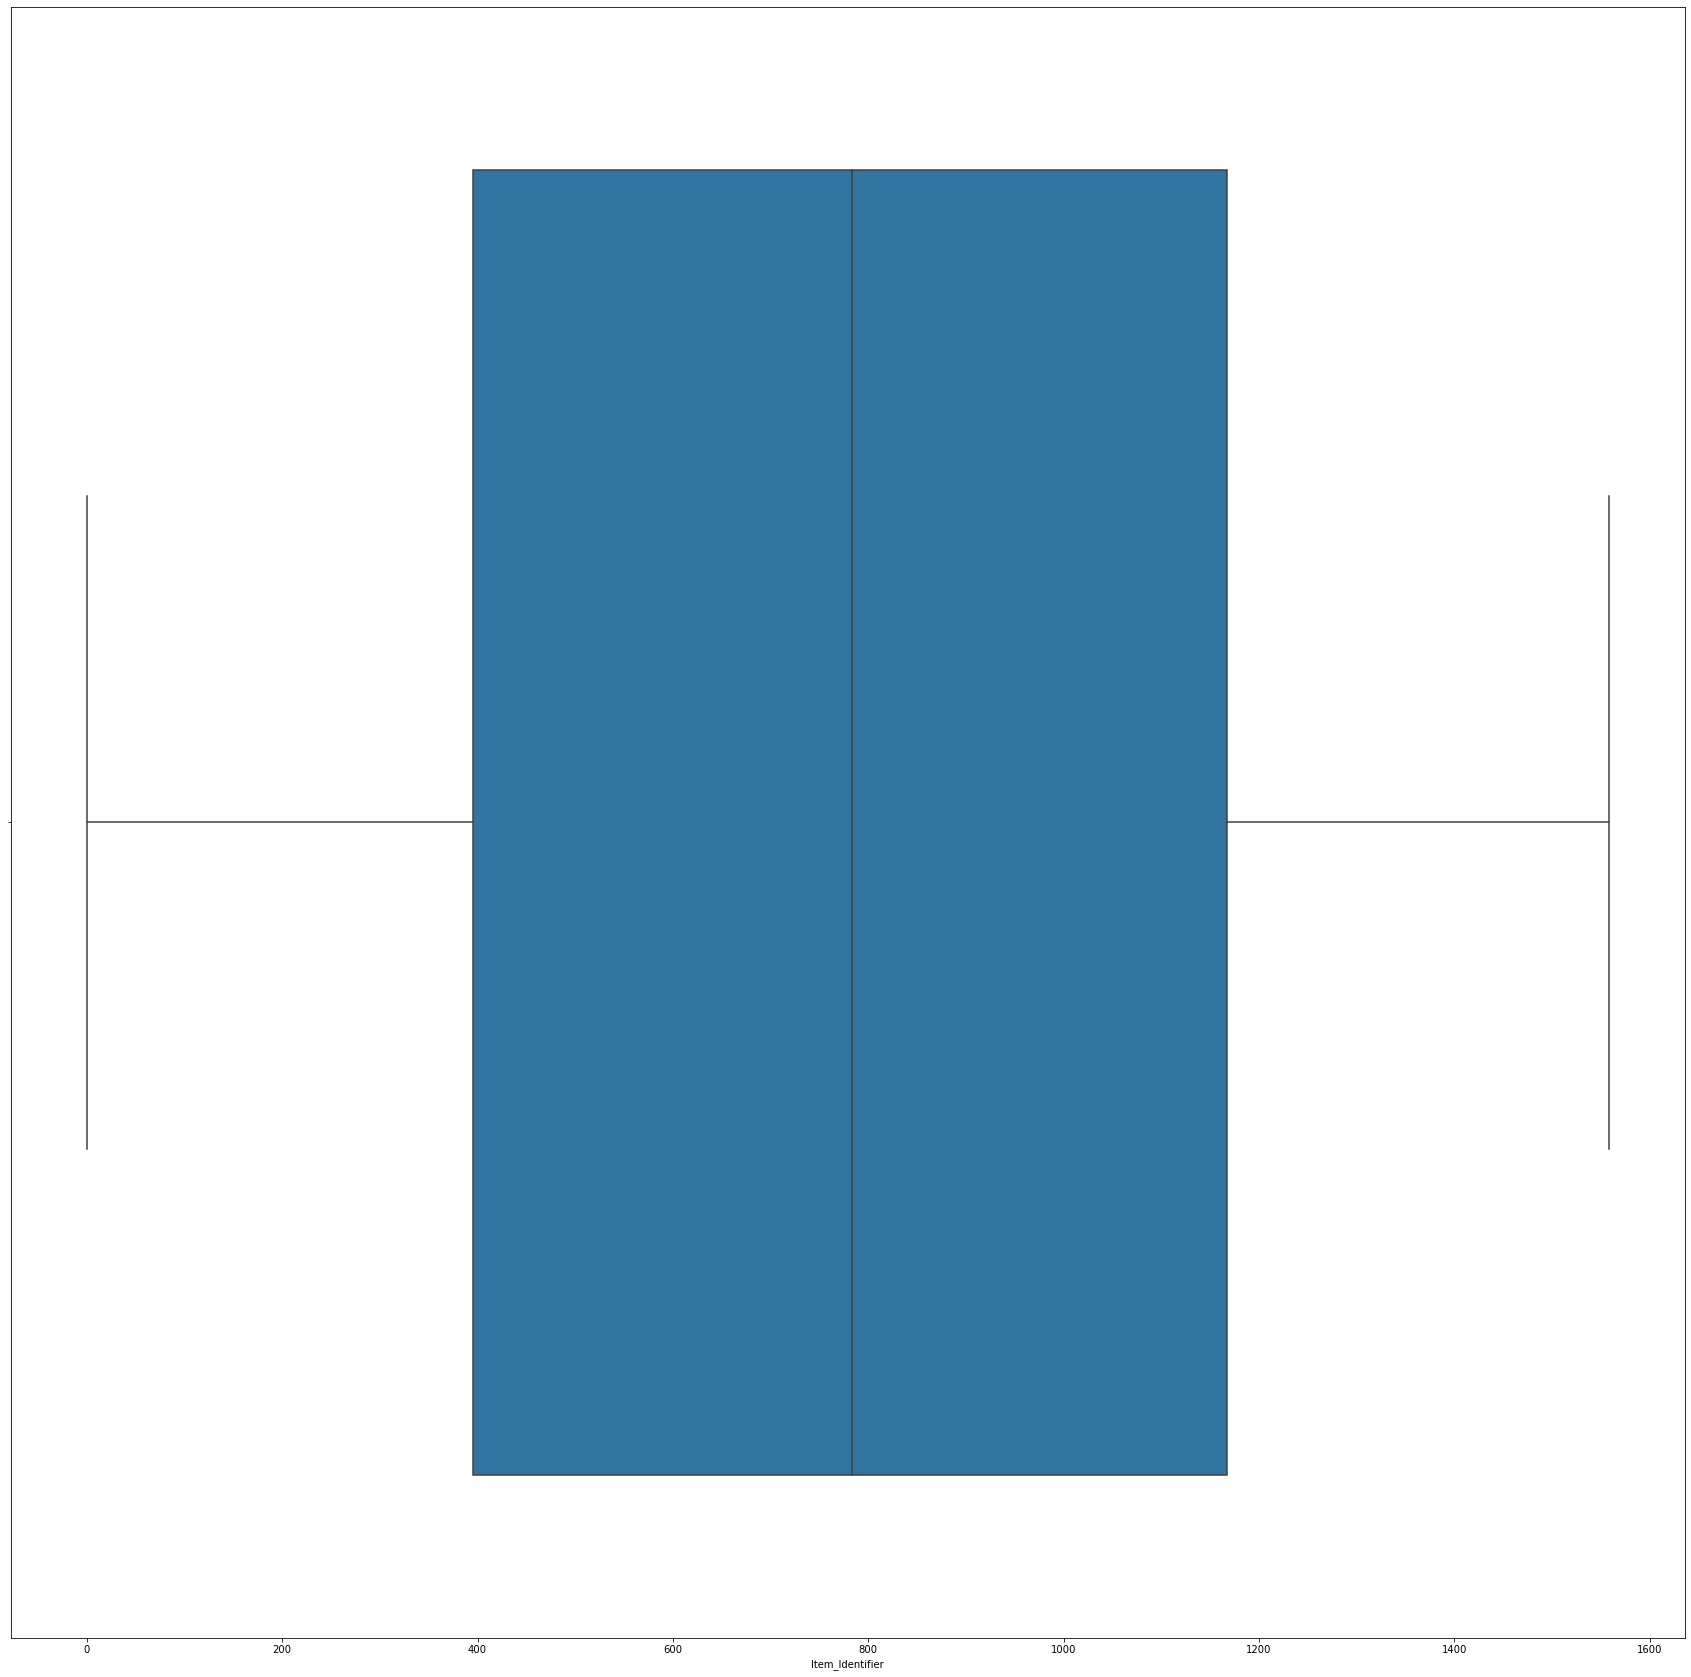

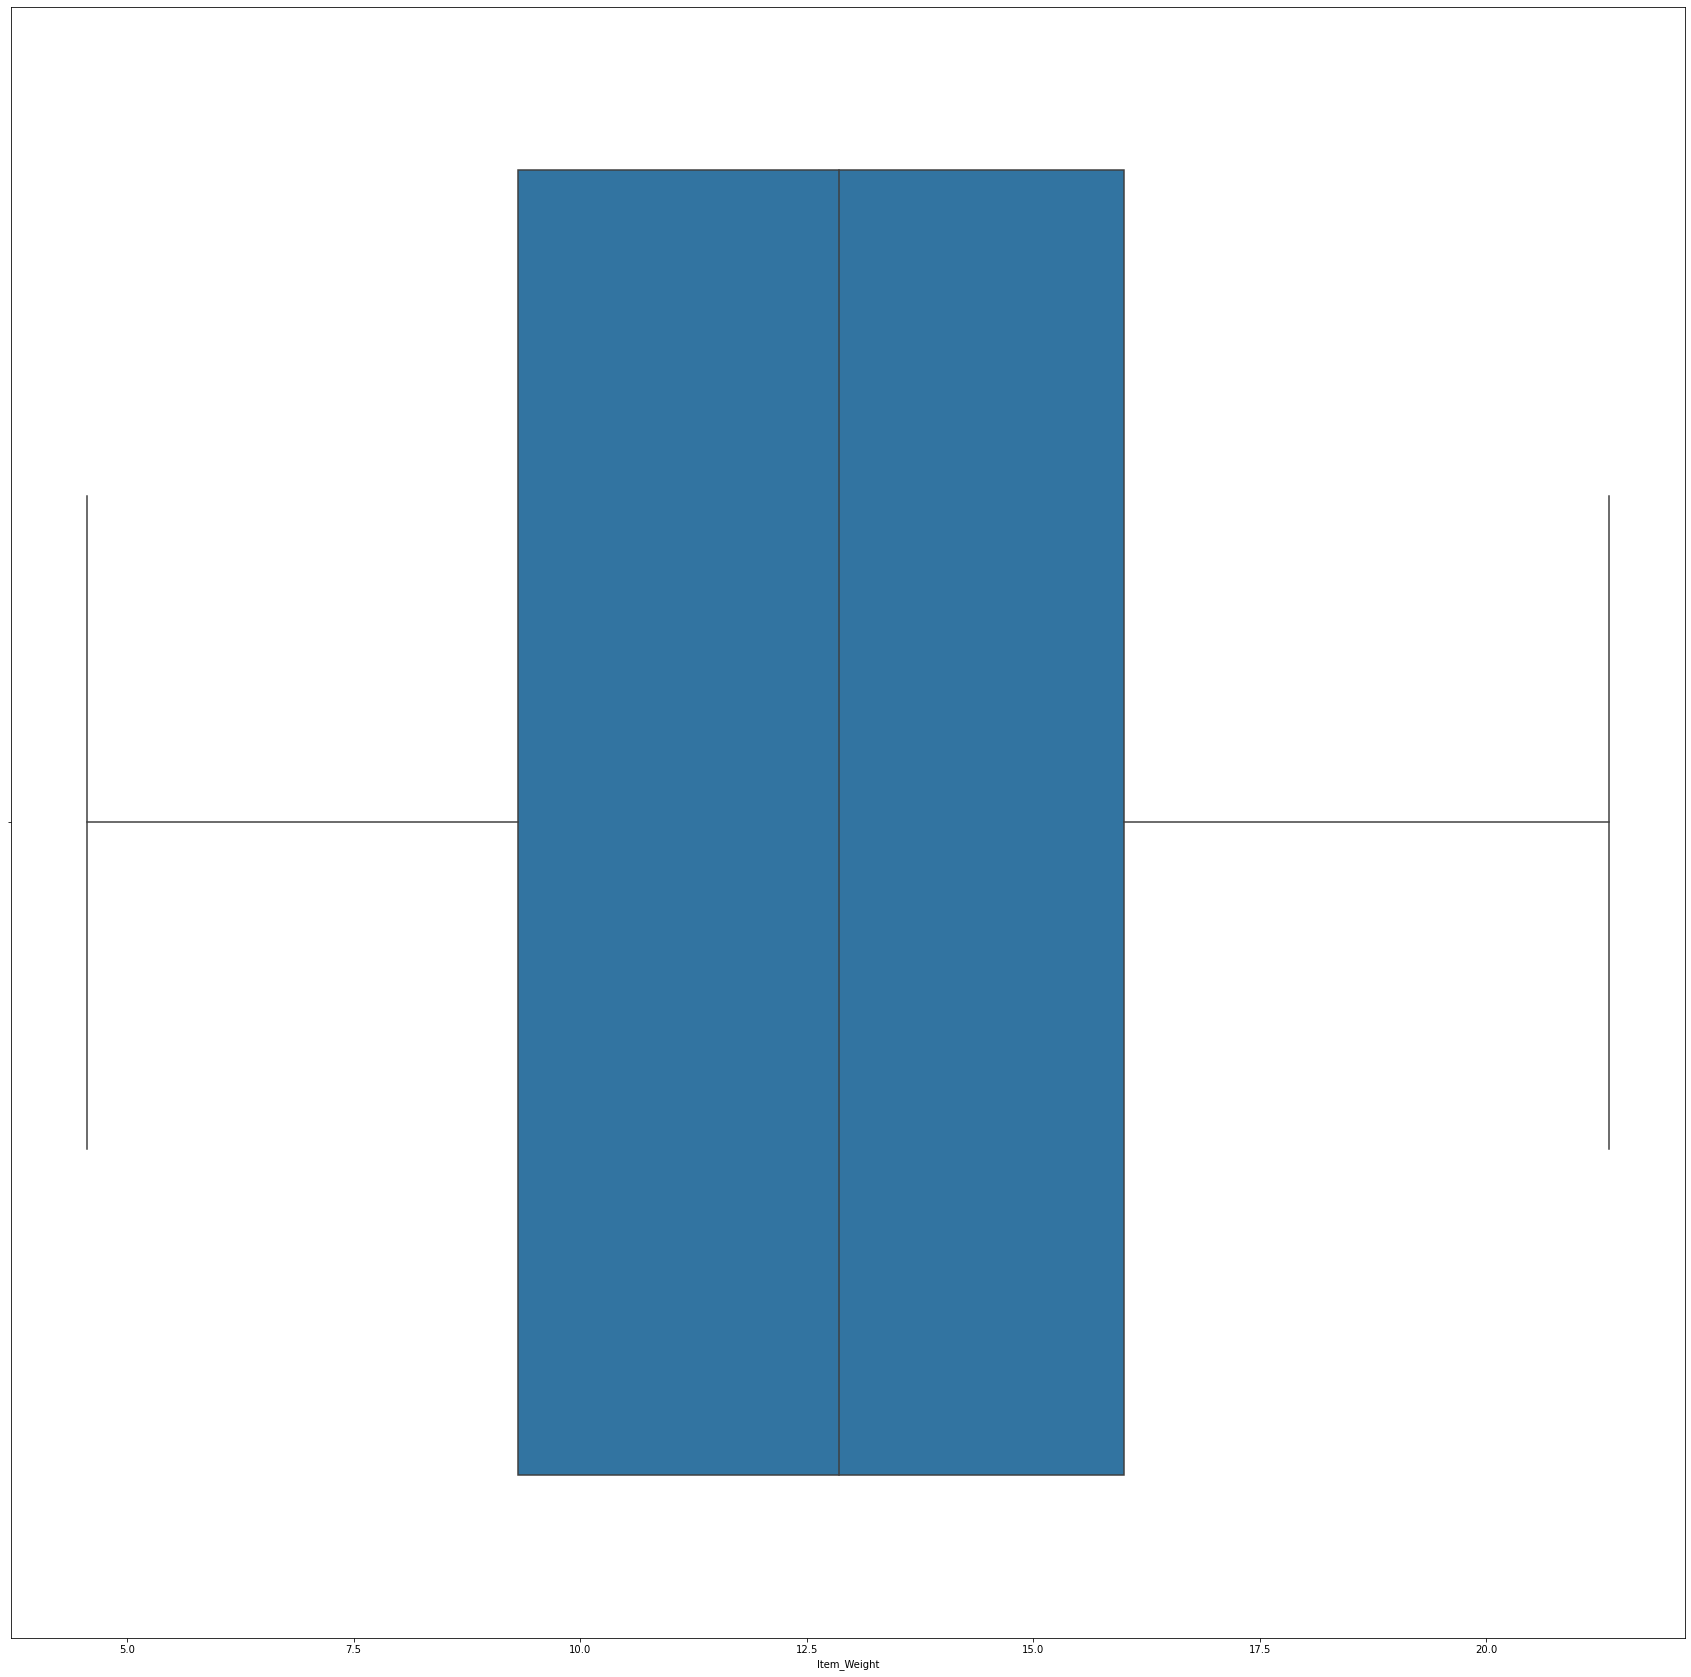

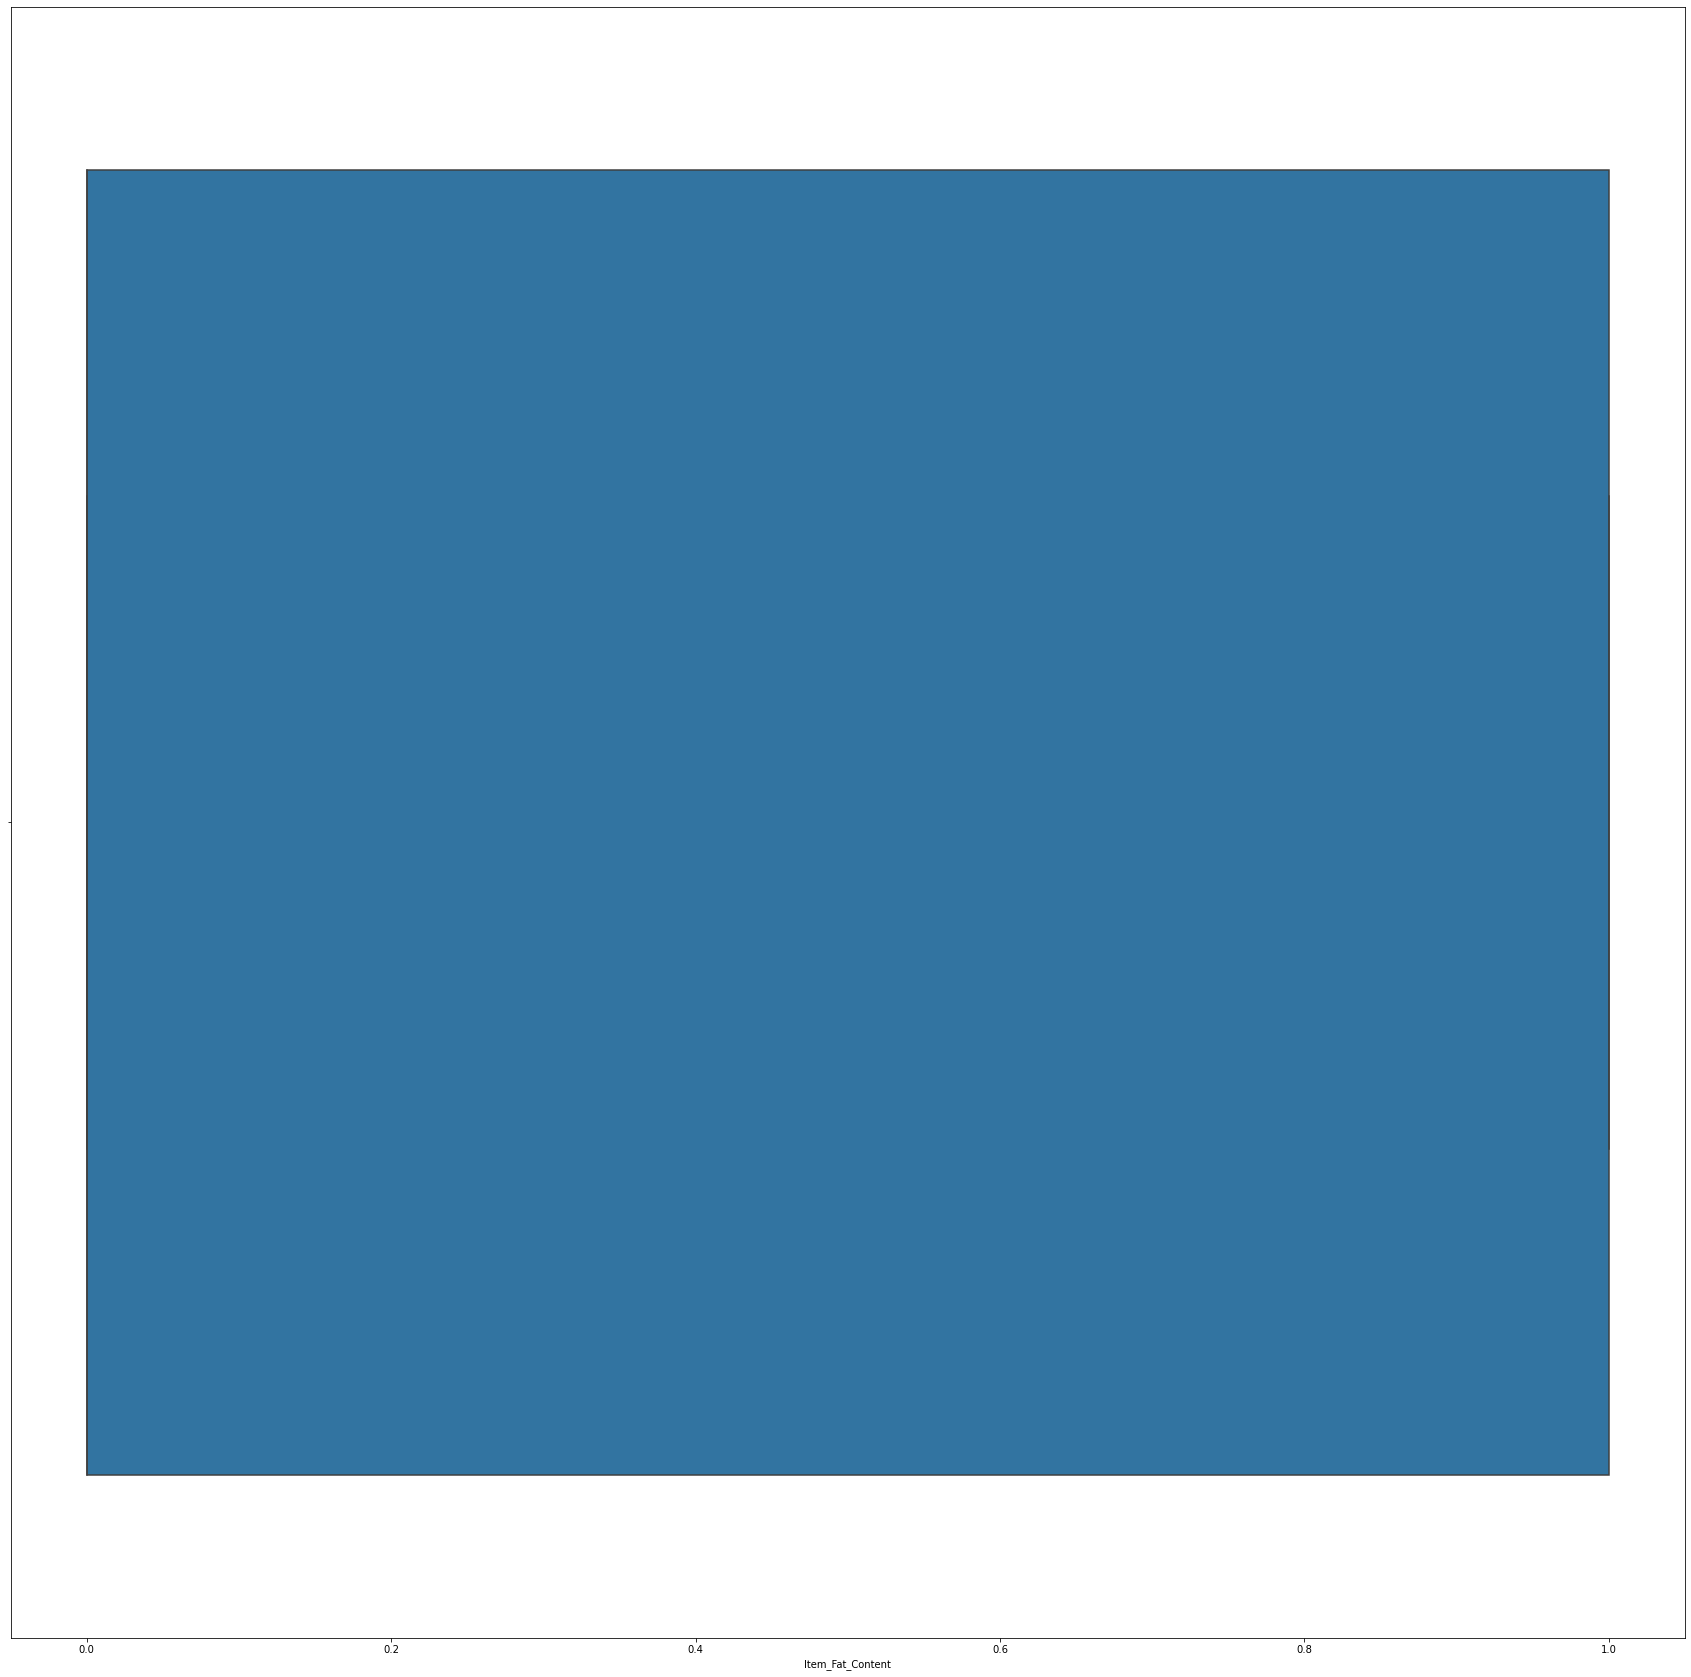

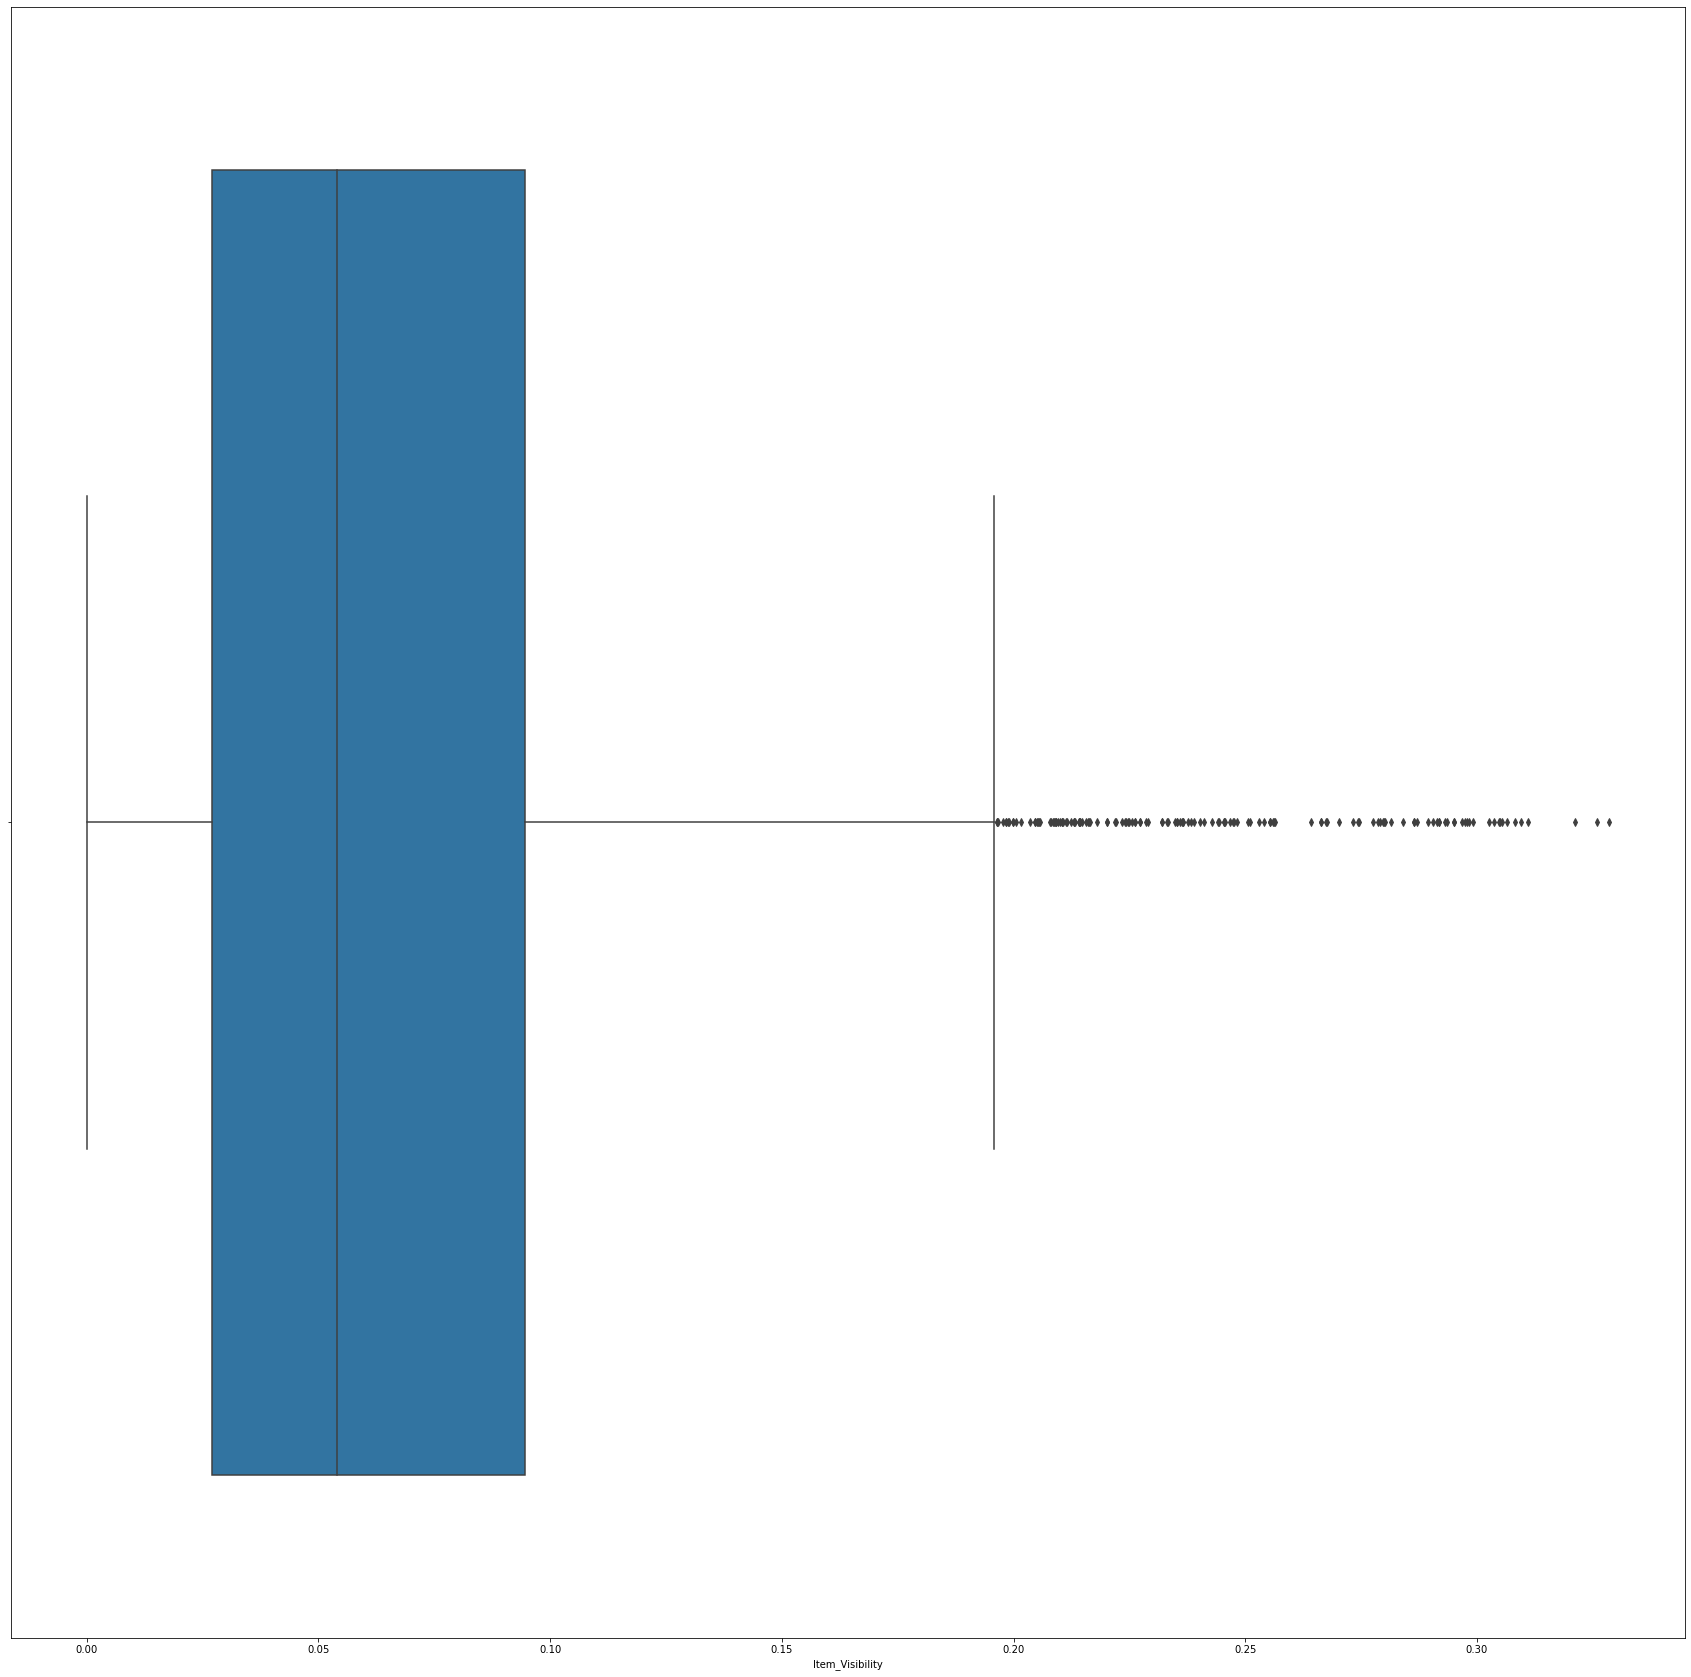

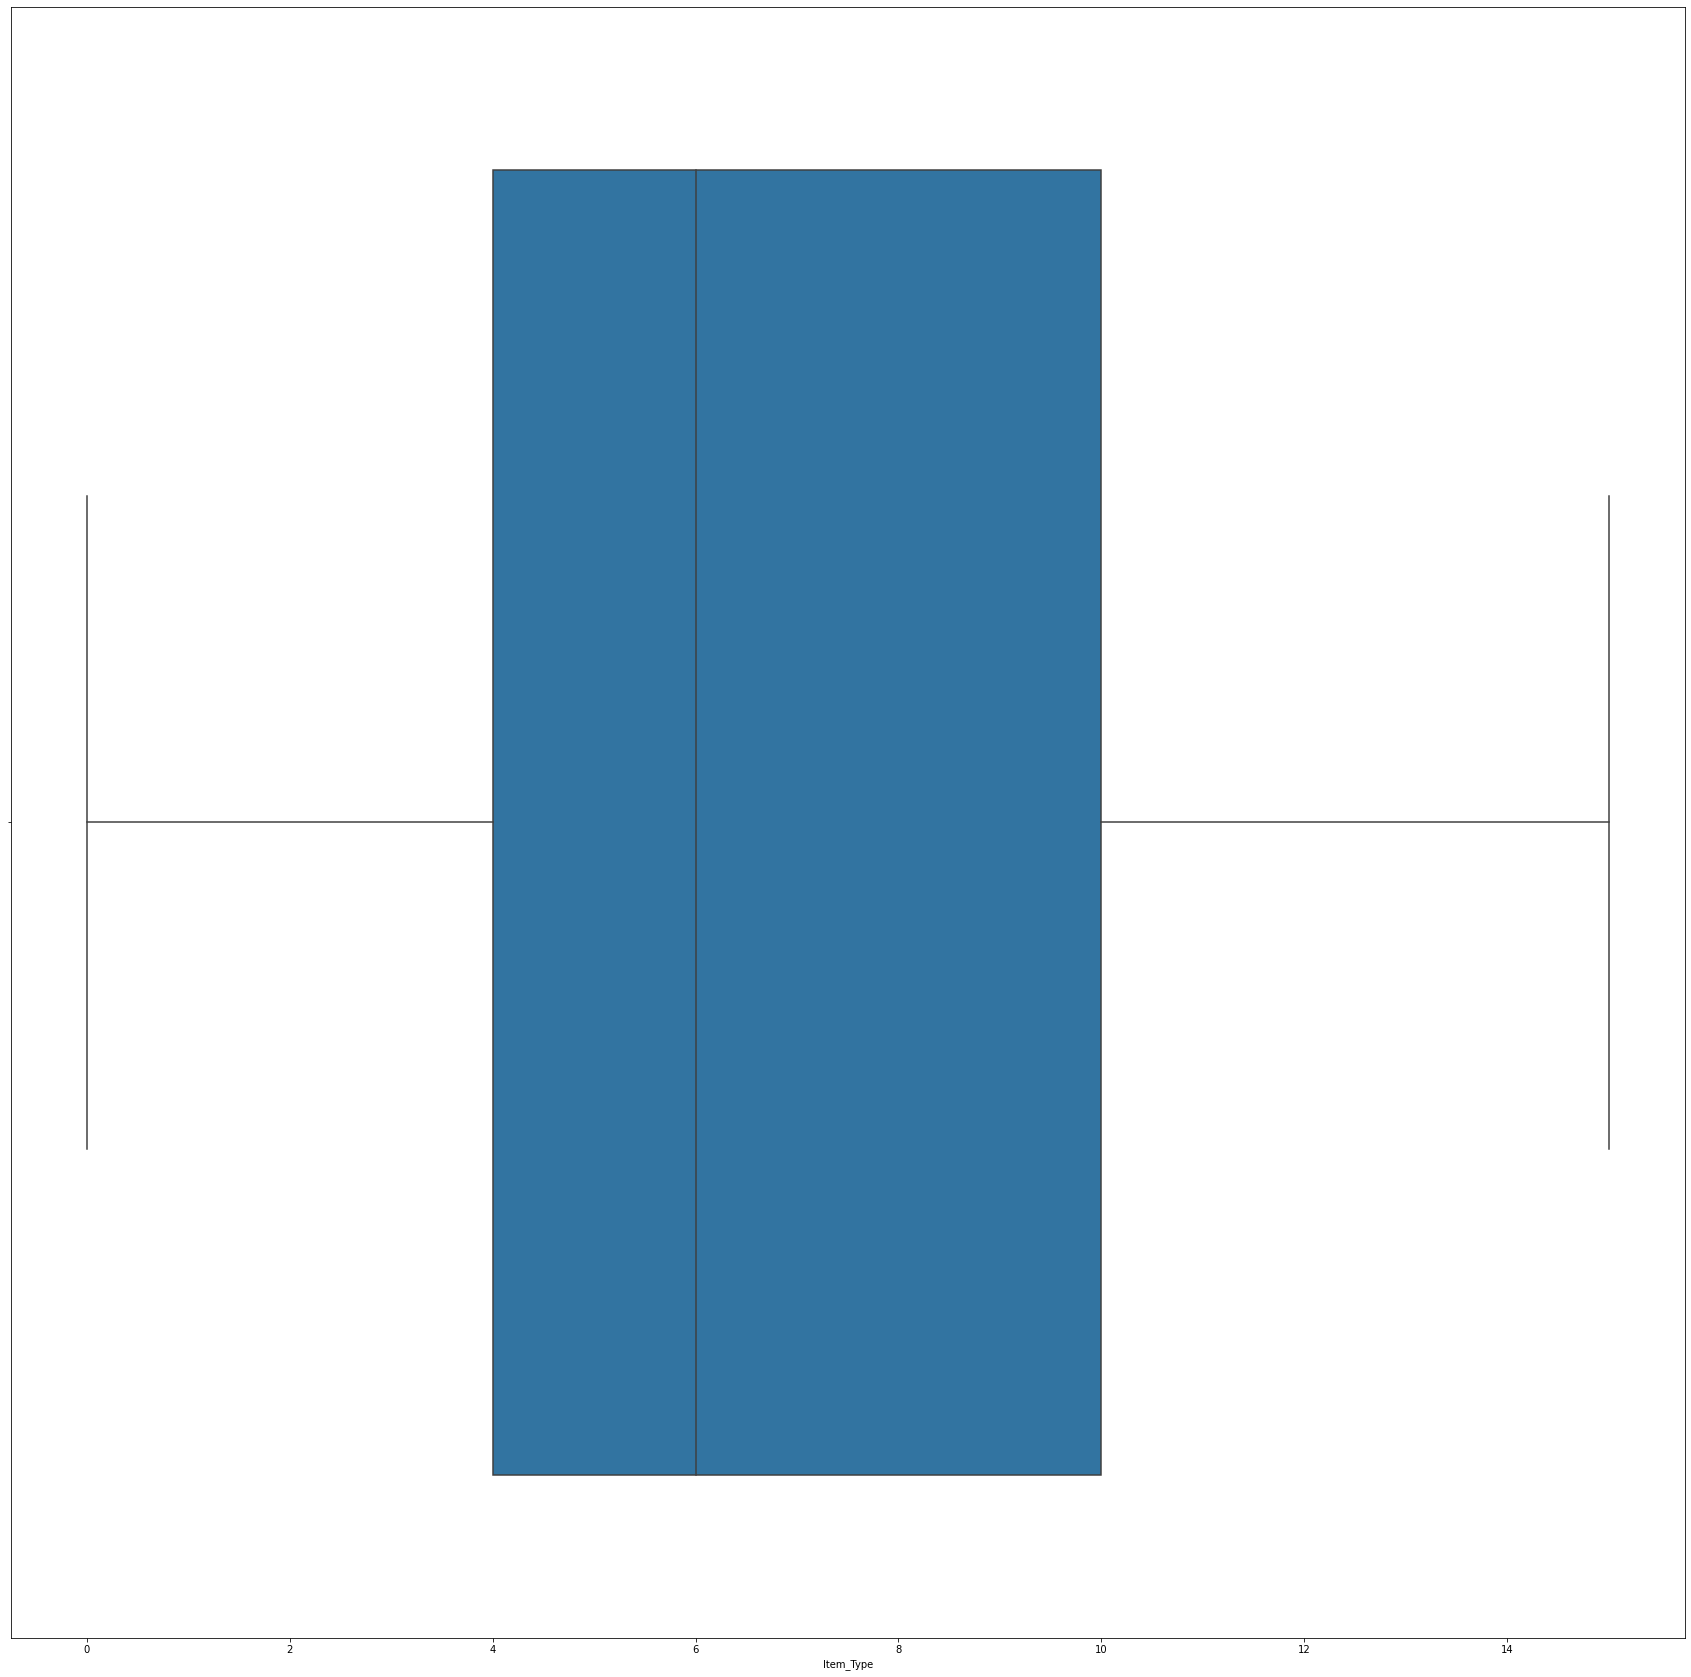

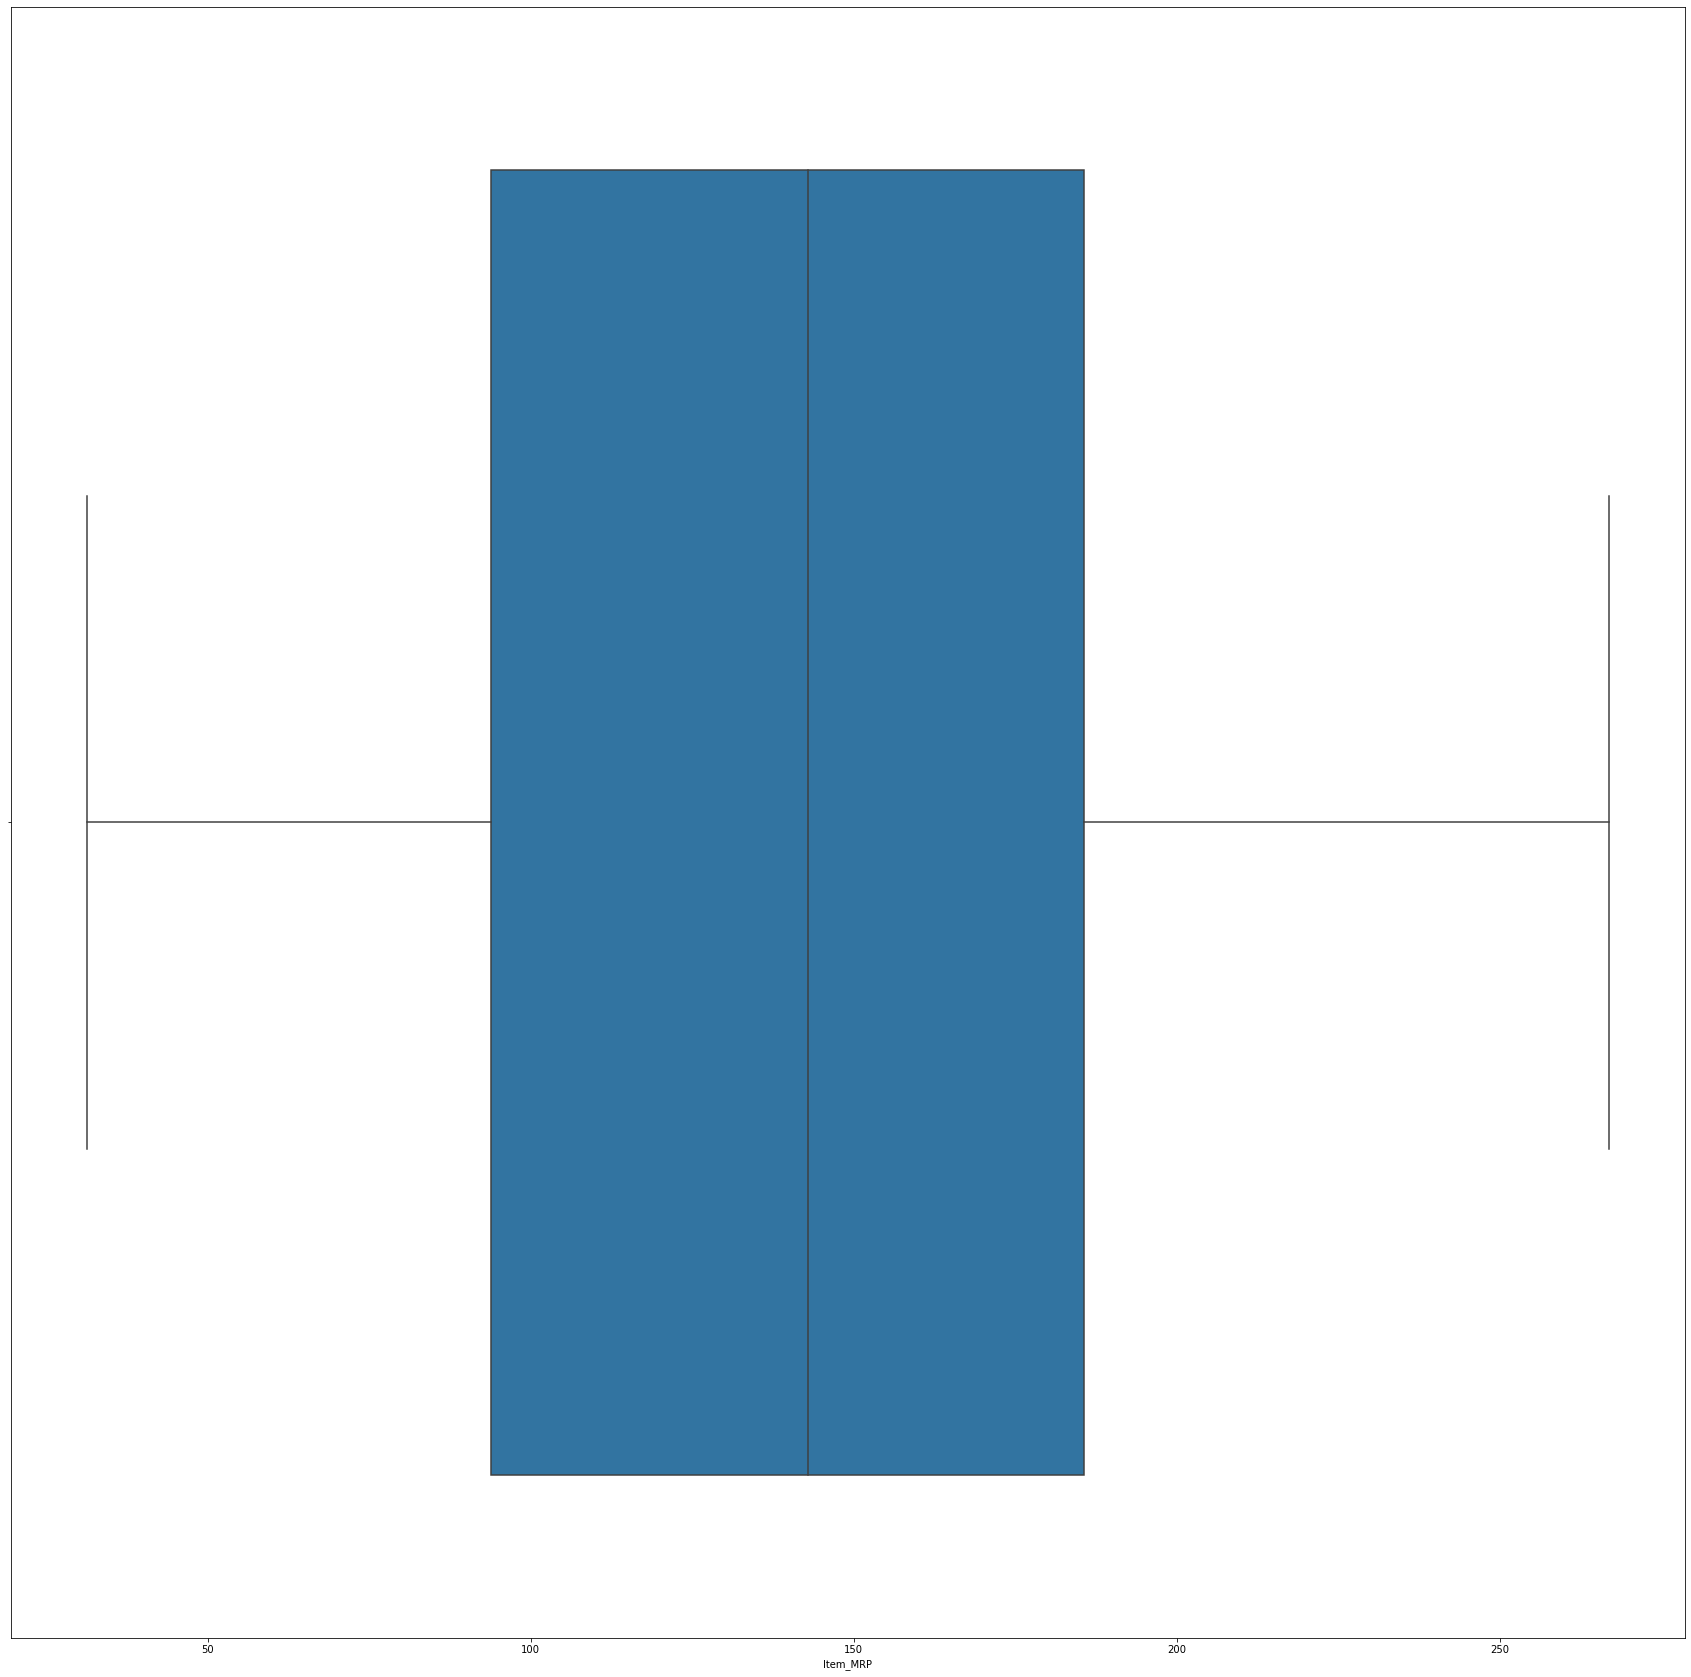

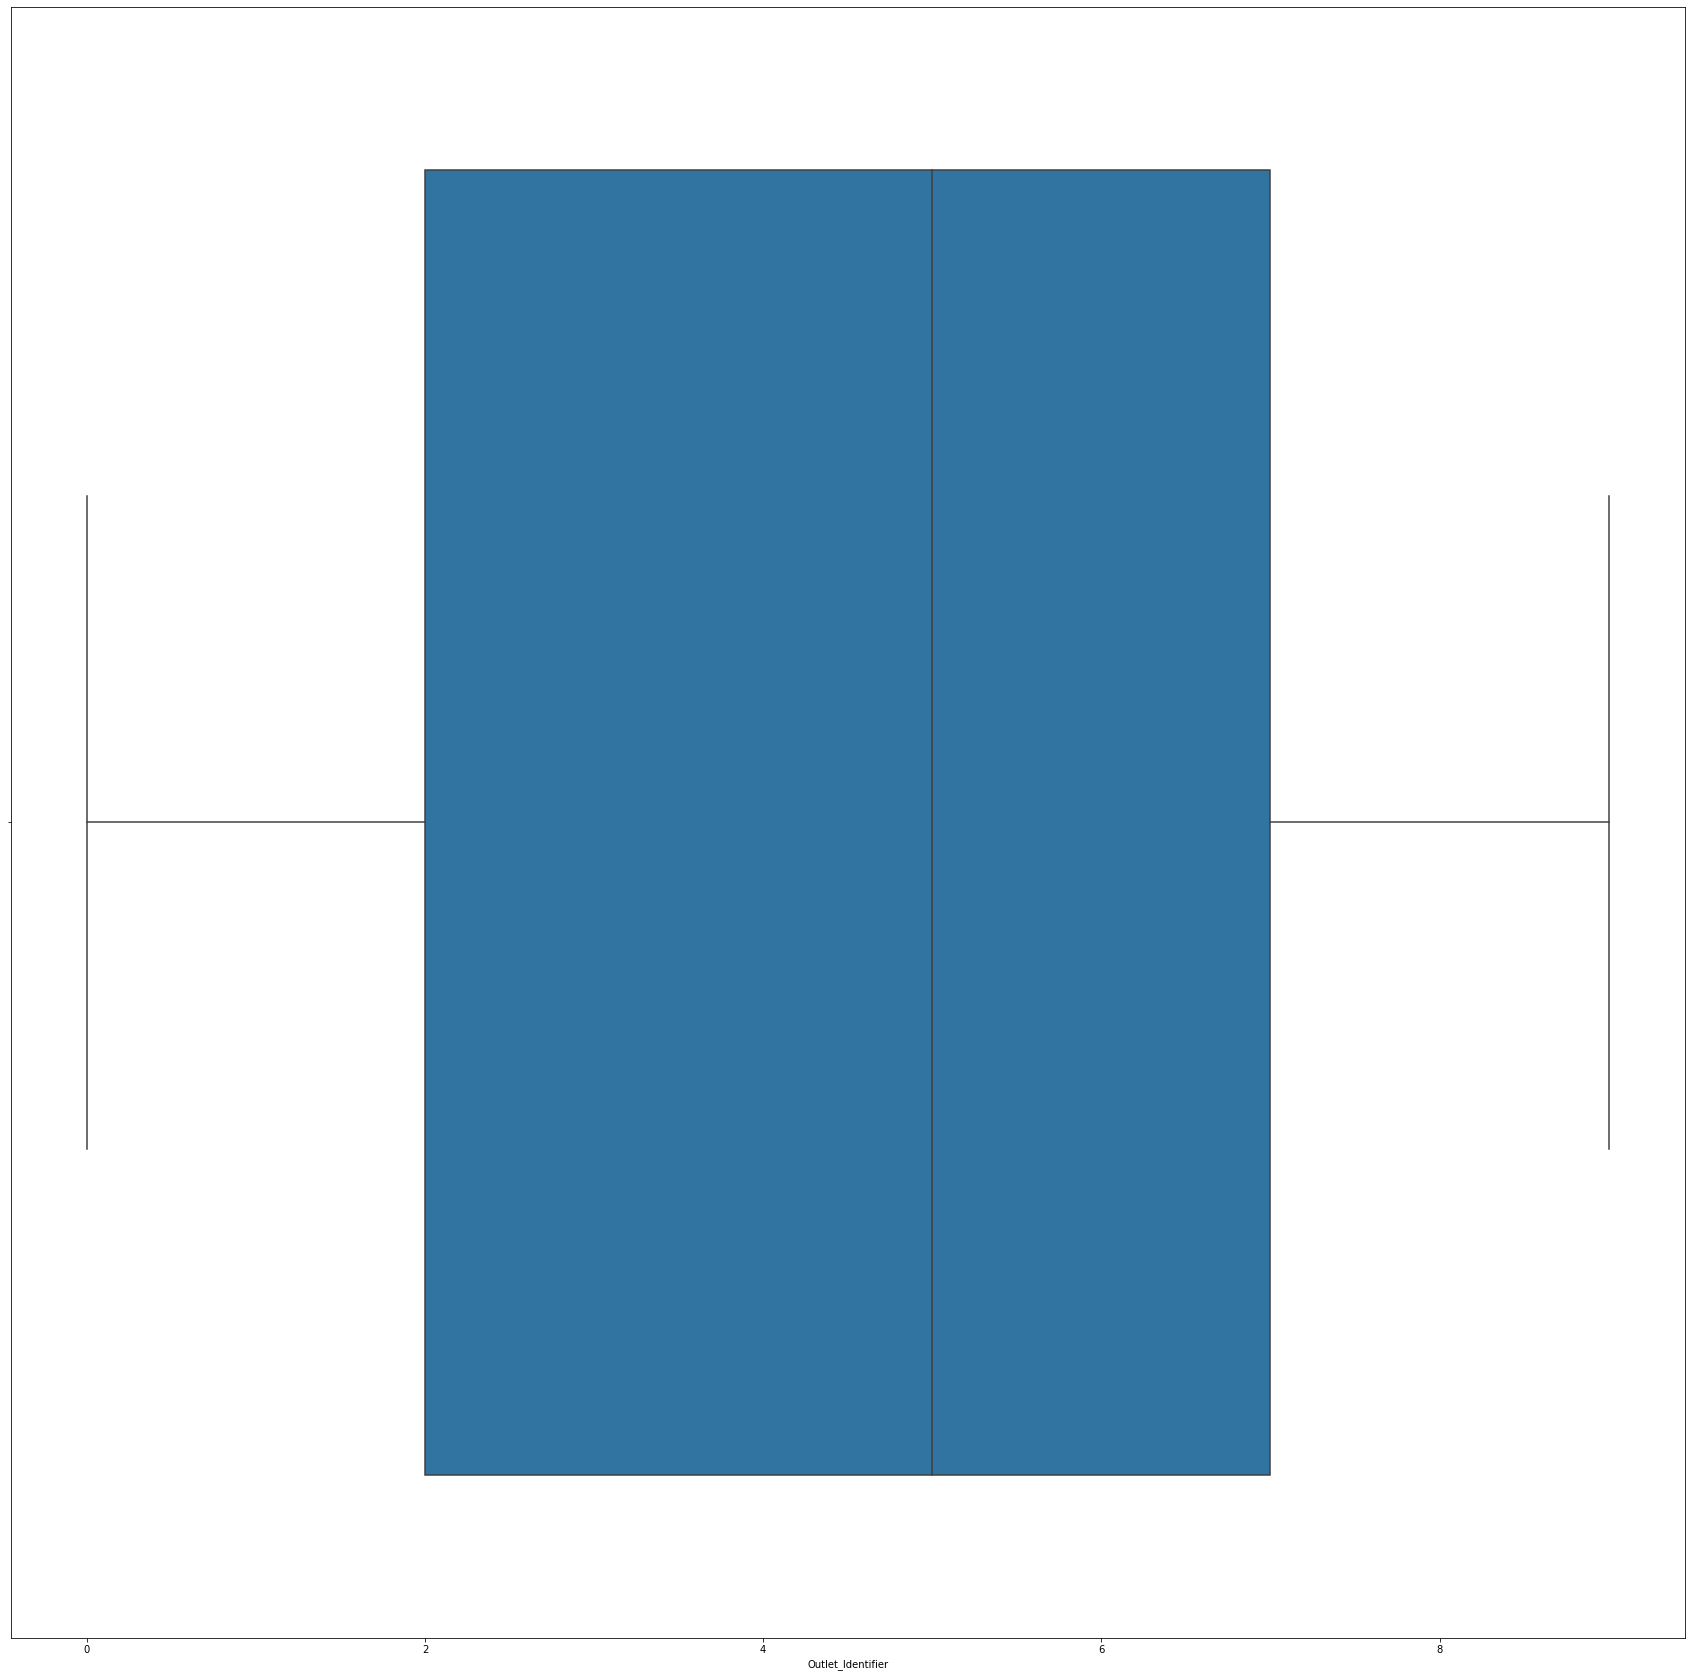

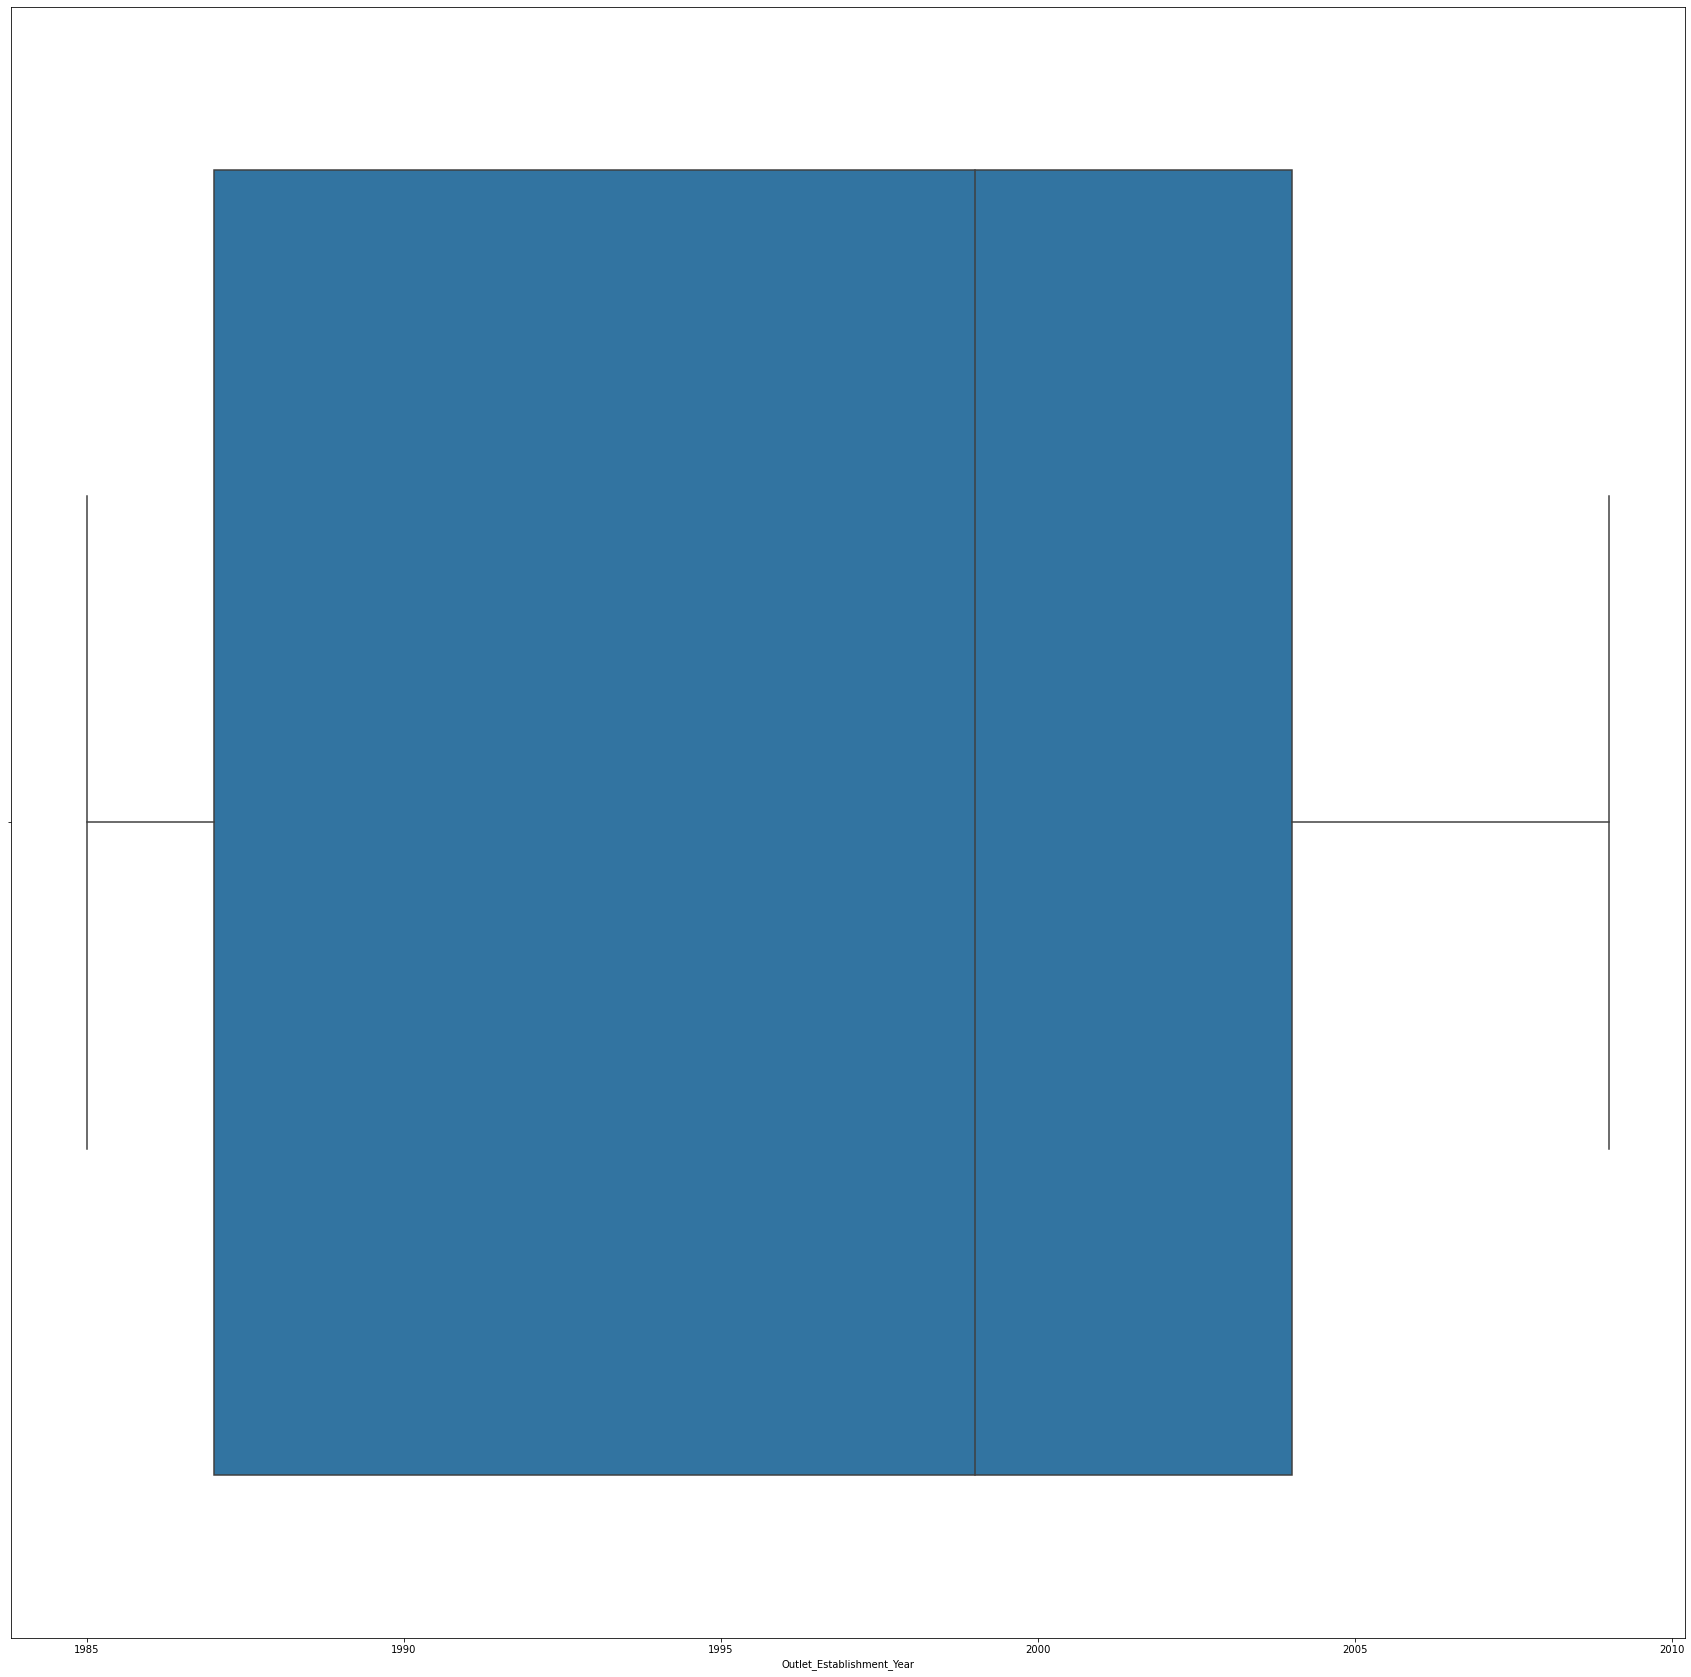

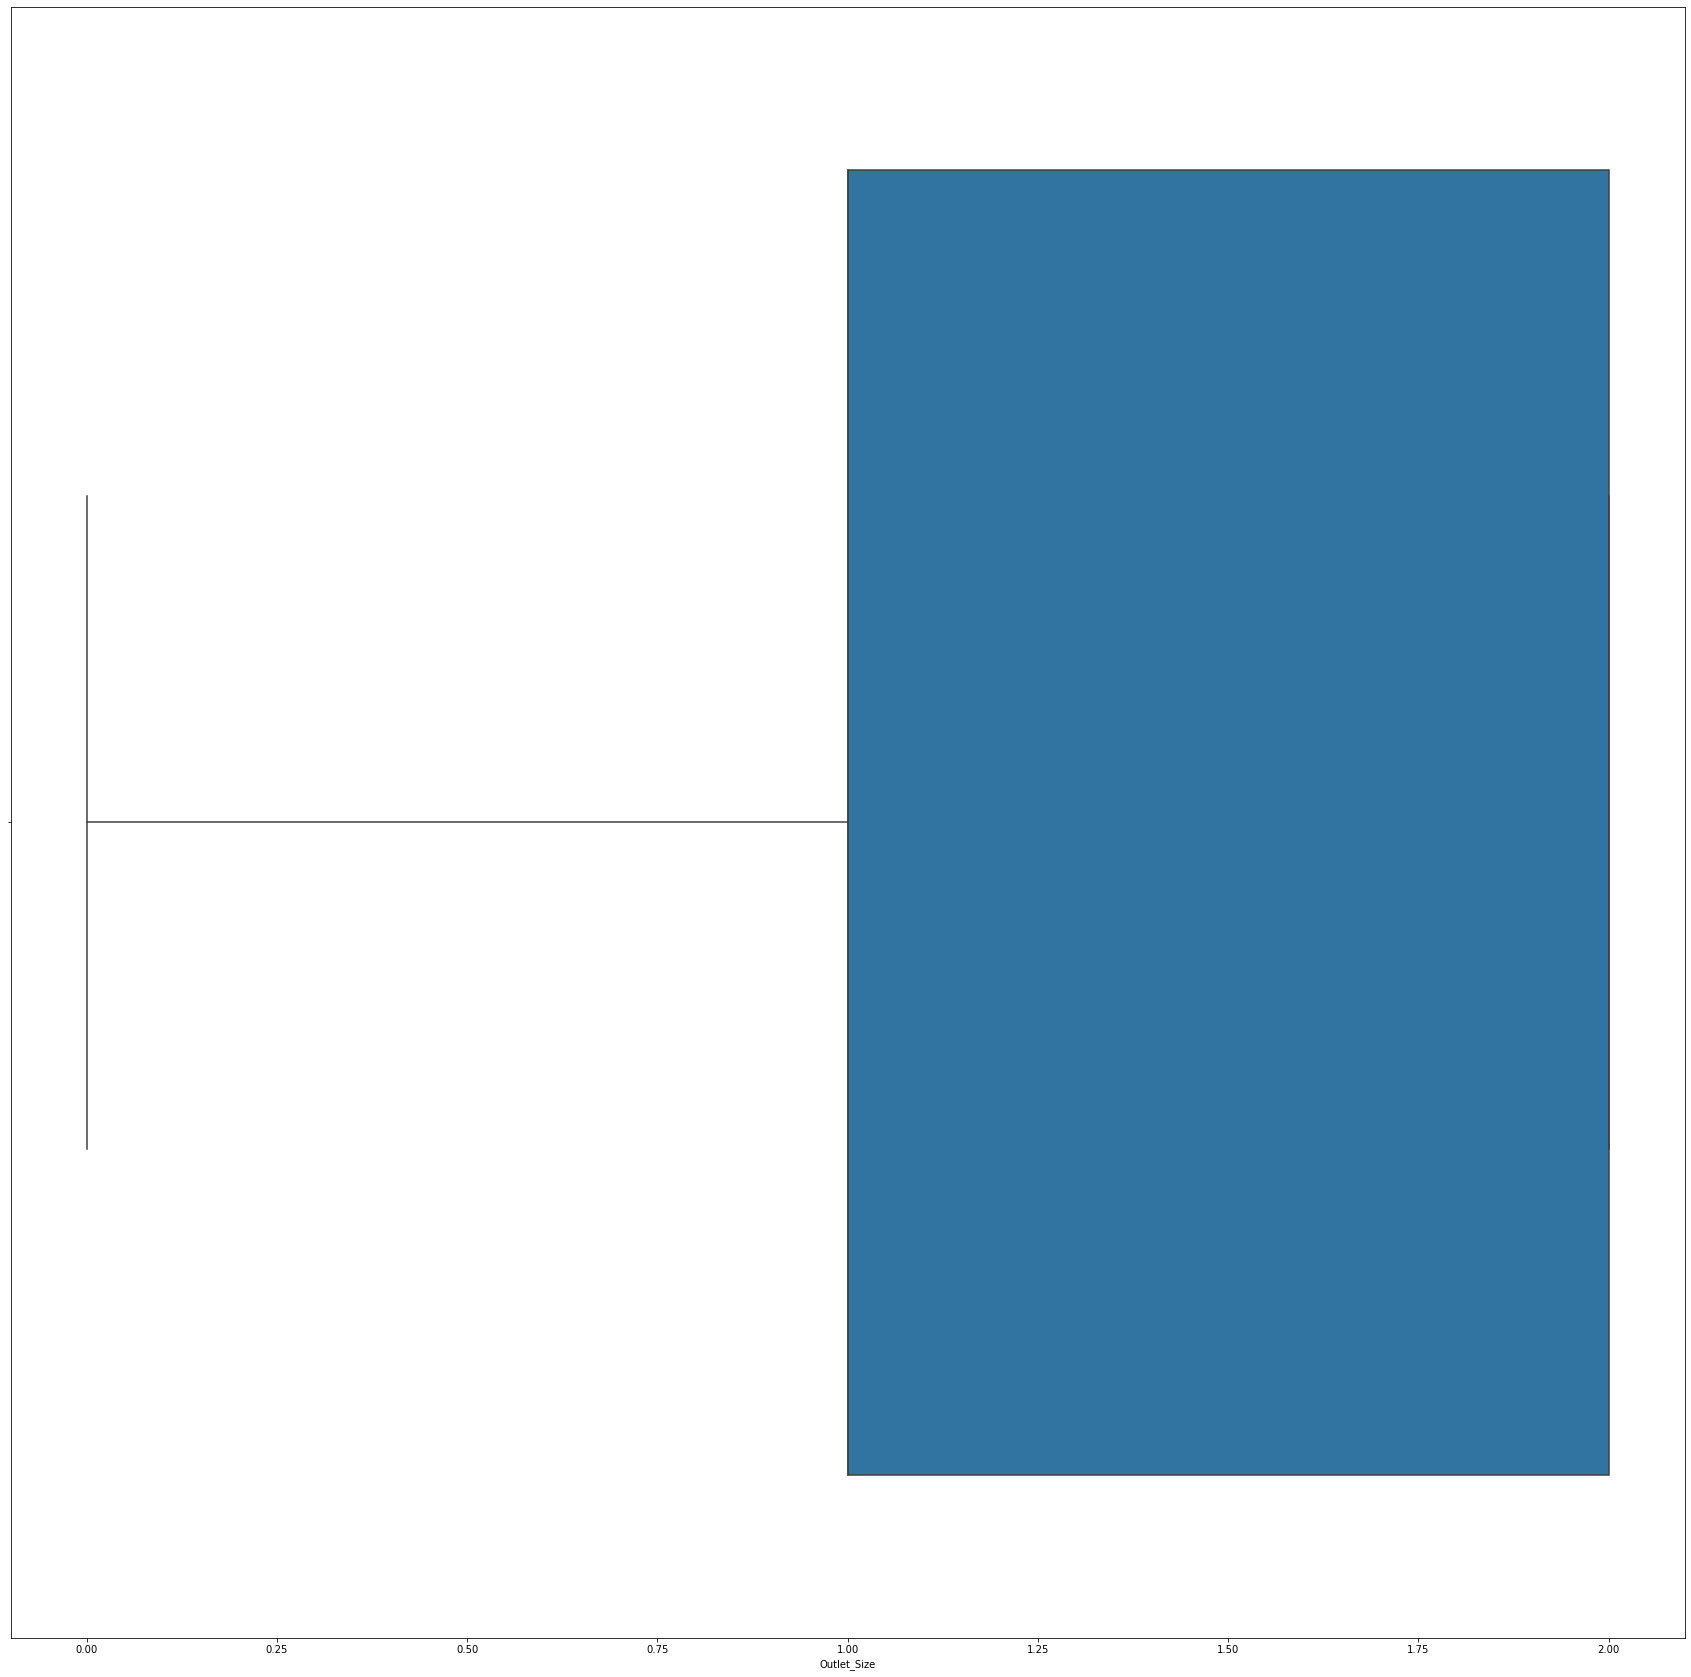

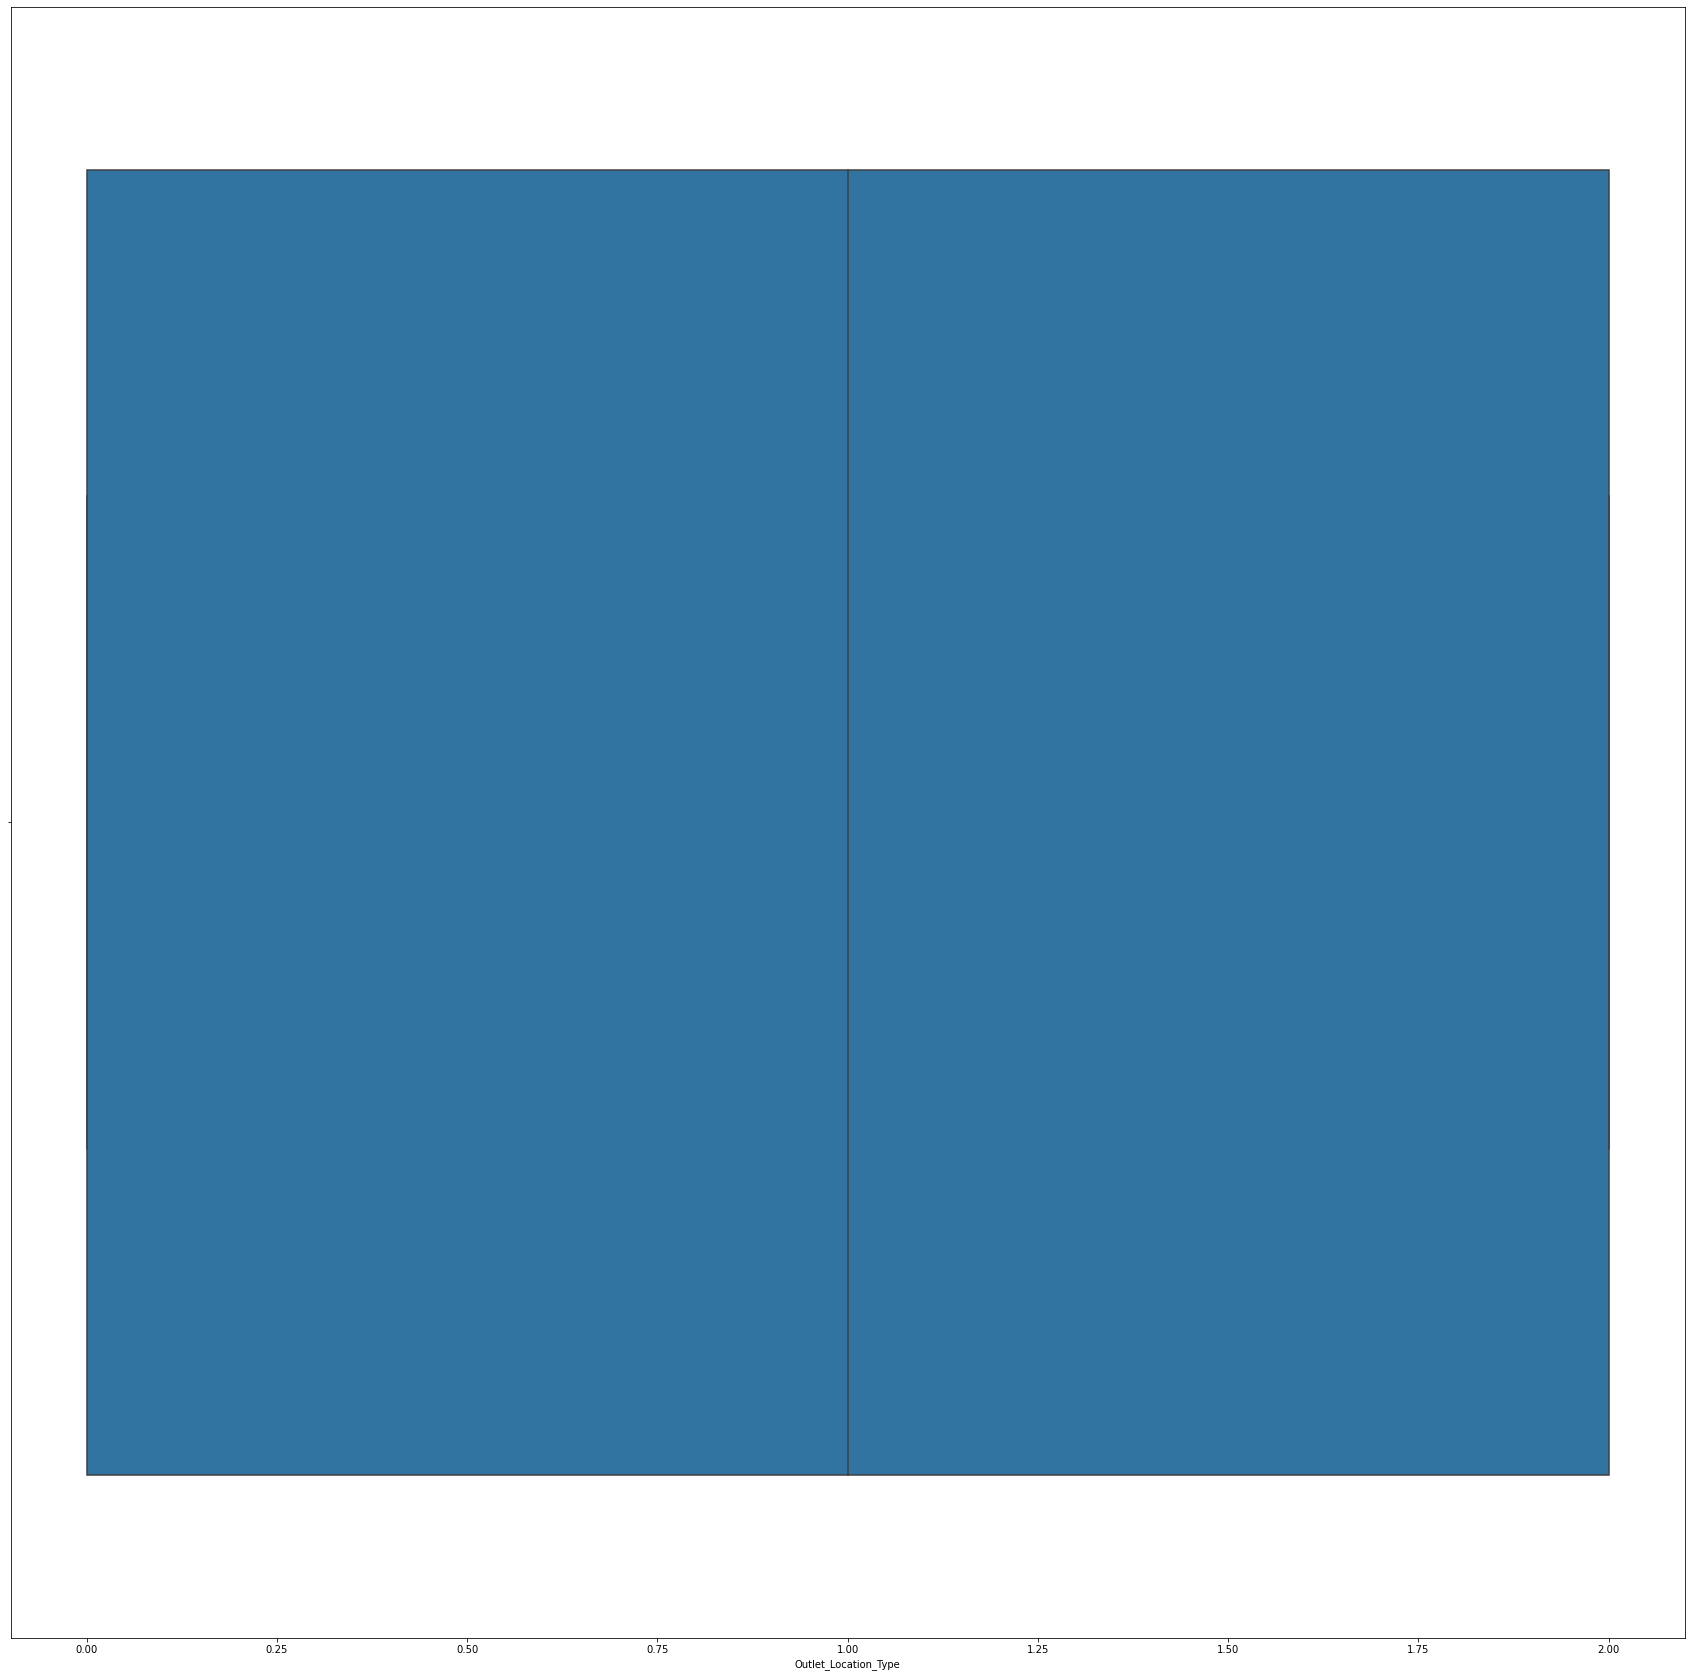

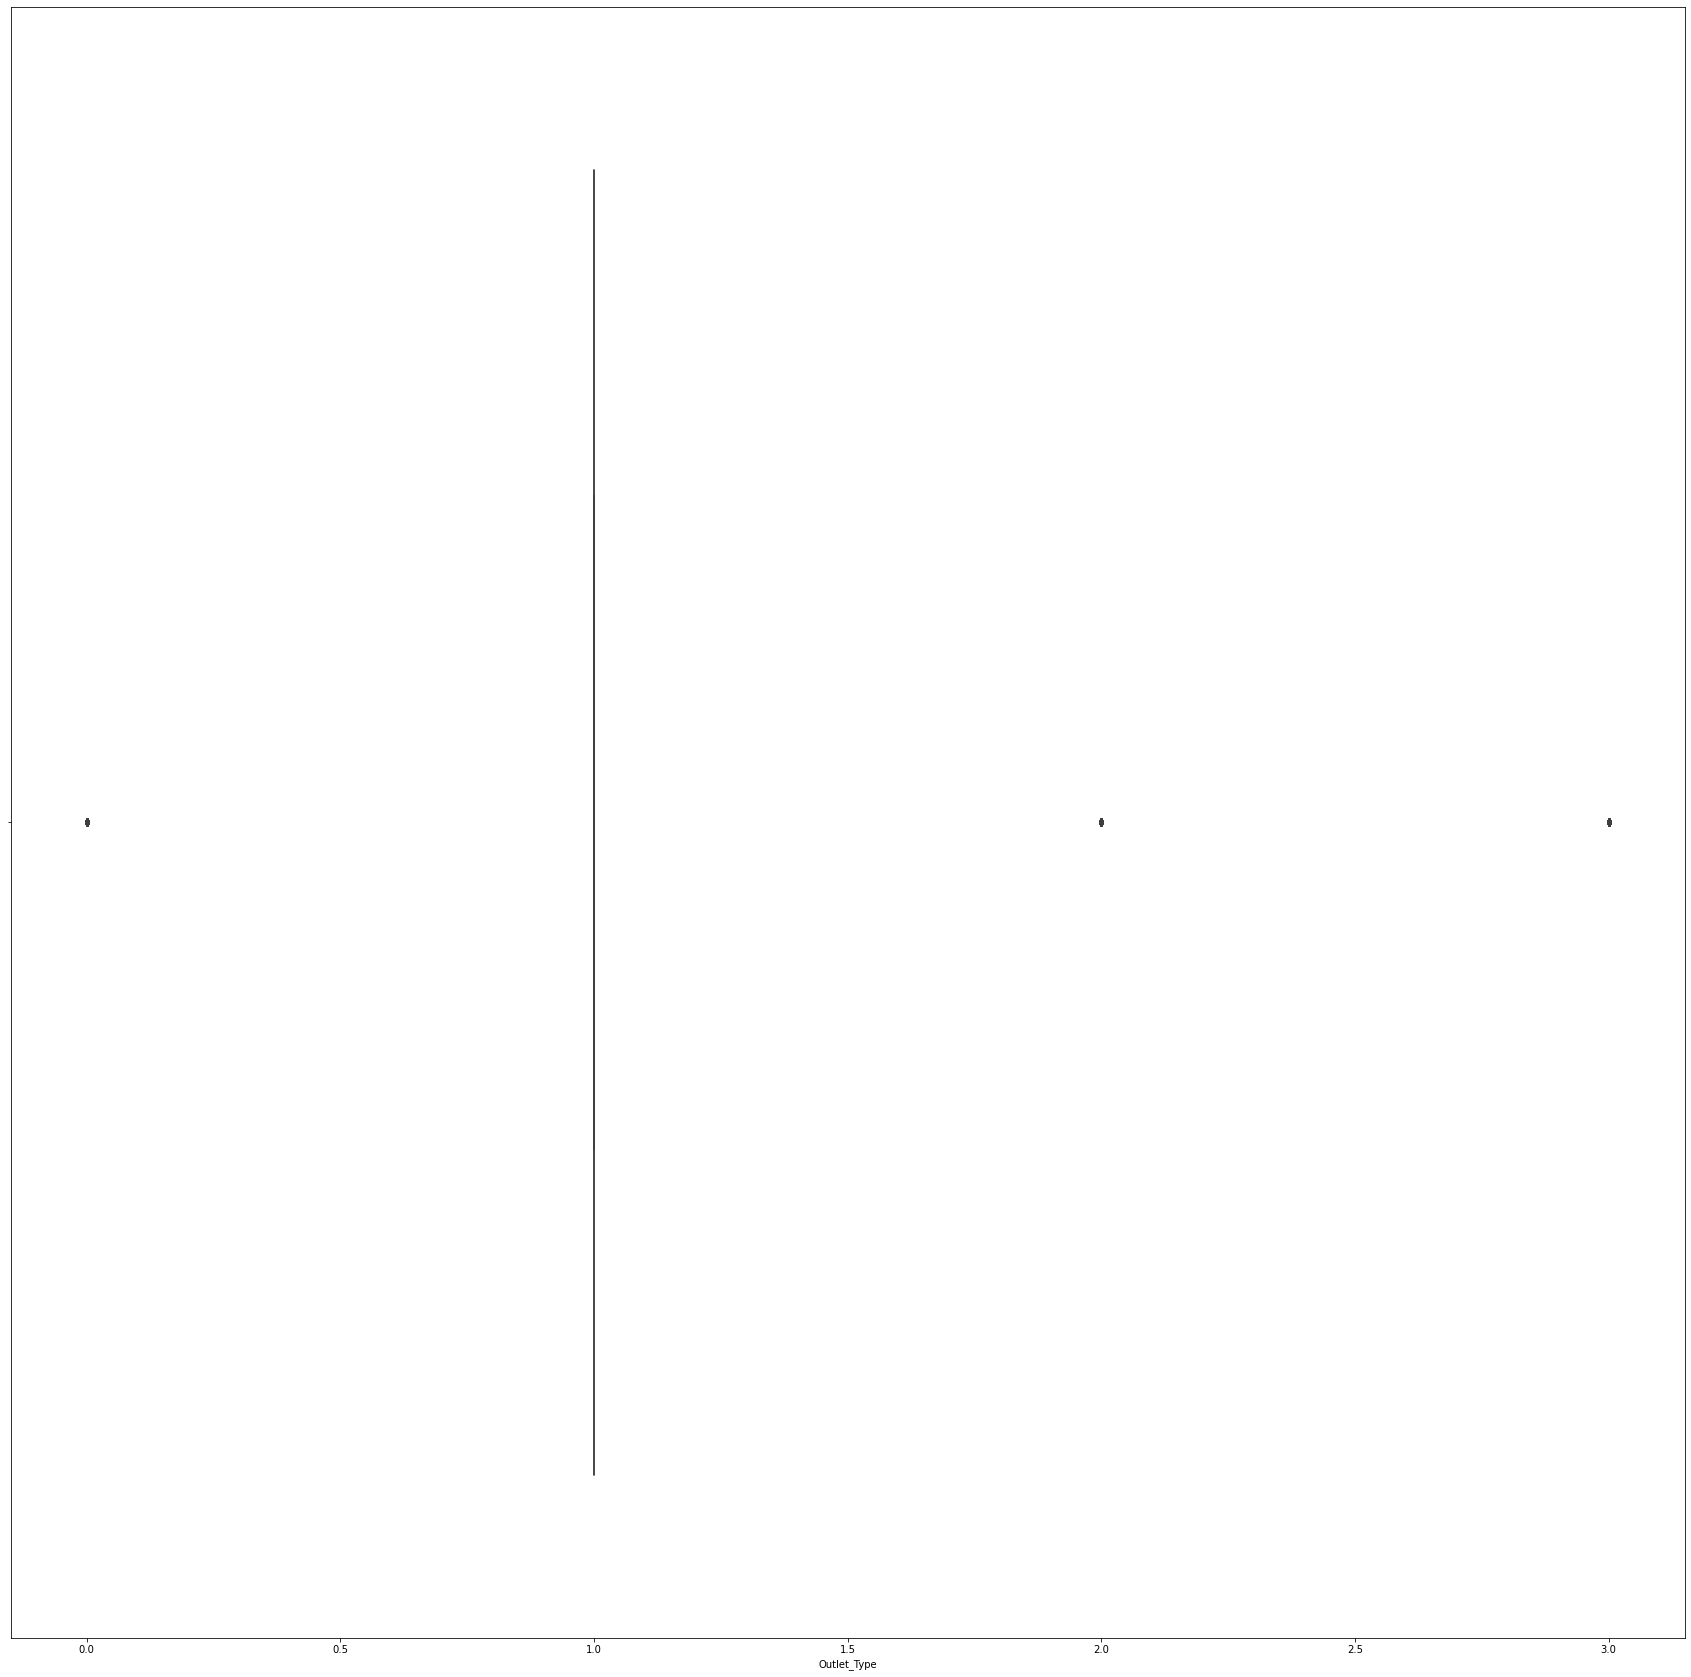

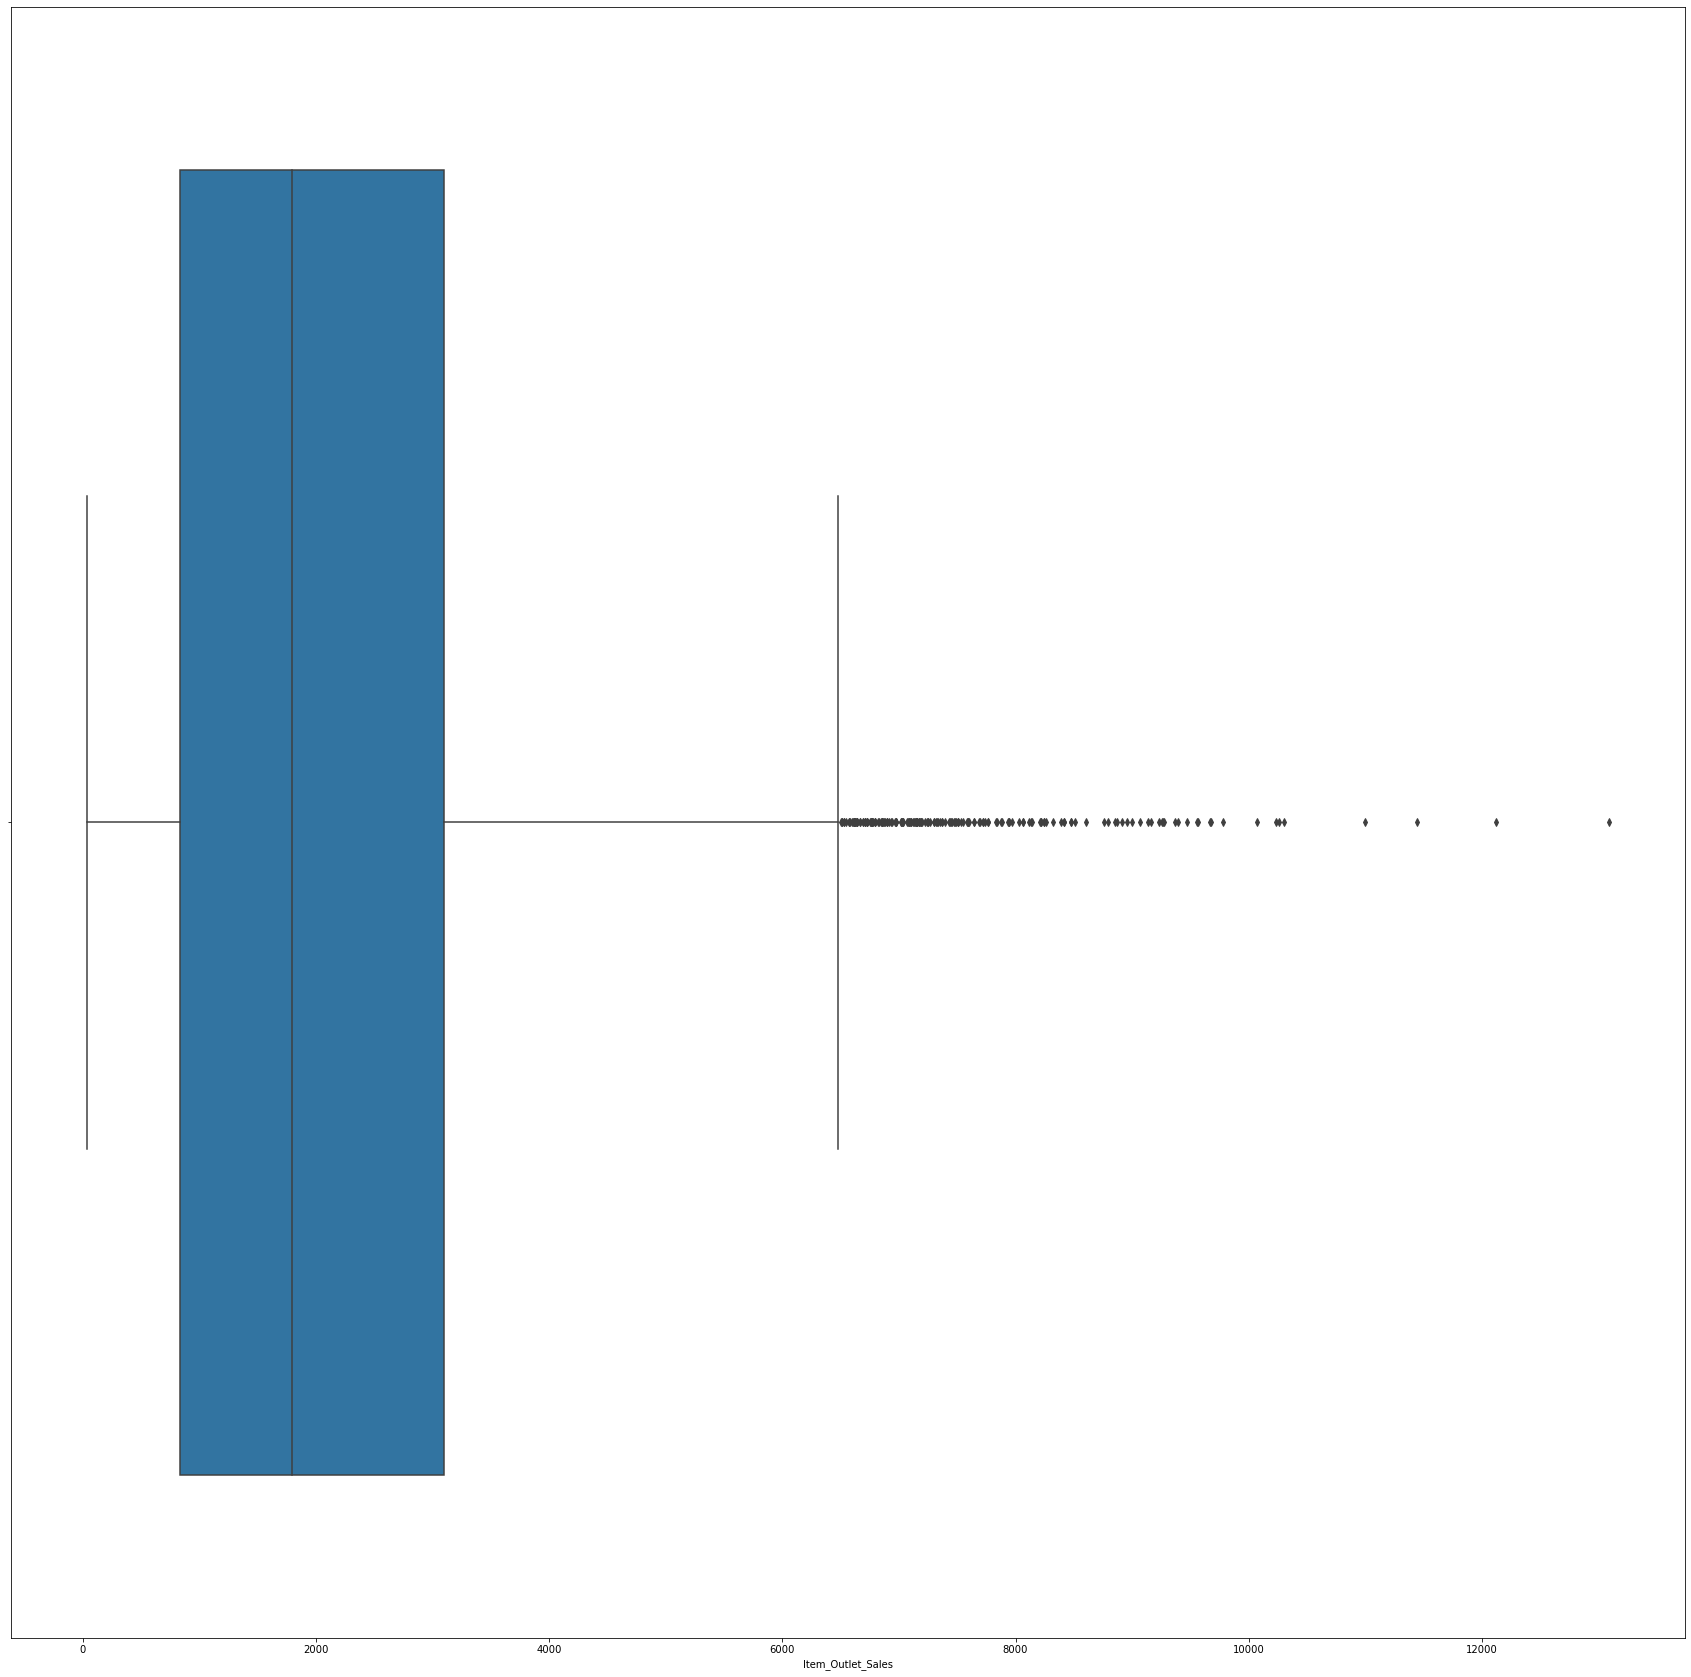

In [105]:
for j in df.columns:
    plt.figure(figsize=(30,30))
    sns.boxplot(x=j,data=df)
    plt.show

In [43]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


In [50]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


(8523, 15)

In [44]:
a = pd.get_dummies(df[['Item_Type','Outlet_Identifier','Outlet_Type']])
df = df.drop(['Item_Type','Outlet_Identifier','Outlet_Type',],axis = 1 )
df = pd.concat([df,a],axis = 1)


(8523, 3)

In [44]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type,Outlet_Identifier,Outlet_Type
0,156,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,4,9,1
1,8,5.920,1,0.019278,48.2692,2009,1,2,443.4228,14,3,2
2,662,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,10,9,1
3,1121,19.200,1,0.000000,182.0950,1998,1,2,732.3800,6,0,0
4,1297,8.930,0,0.000000,53.8614,1987,0,2,994.7052,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,13,1,1
8519,897,8.380,1,0.046982,108.1570,2002,1,1,549.2850,0,7,1
8520,1357,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,8,6,1
8521,681,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,13,3,2



## Removing the outliers

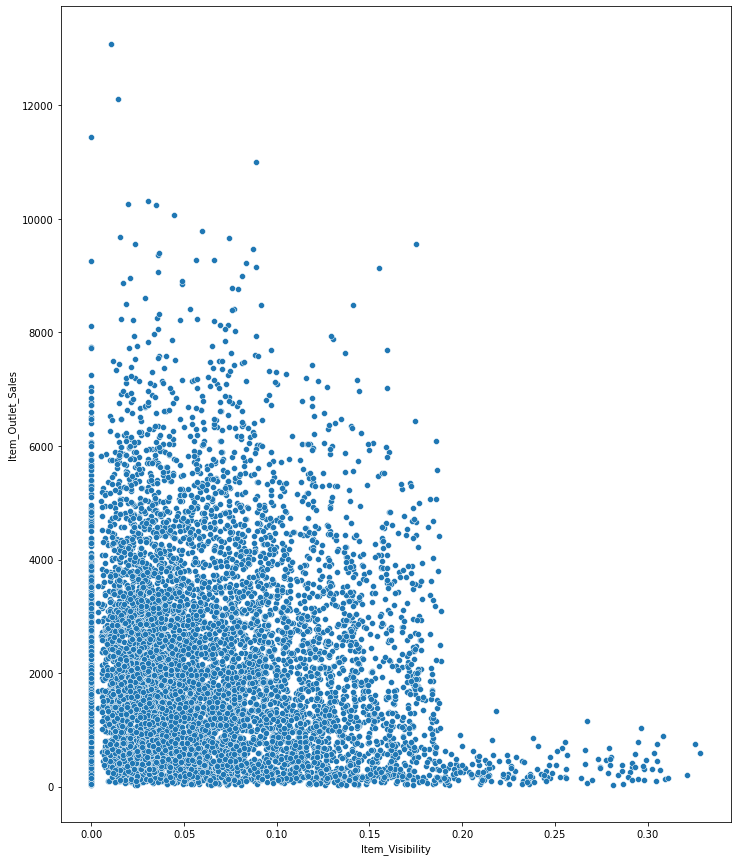

In [45]:
plt.figure(figsize=(12,15))
sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'])
plt.show()

In [46]:
df=df[df['Item_Visibility']<0.30]

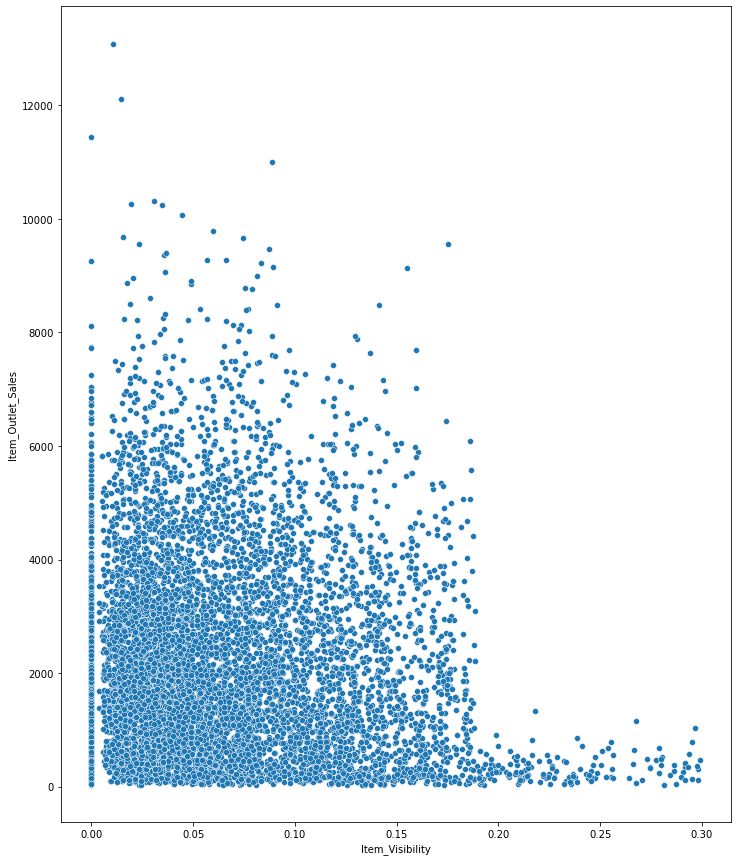

In [47]:
plt.figure(figsize=(12,15))
sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'])
plt.show()

In [48]:

df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Type'],
      dtype='object')

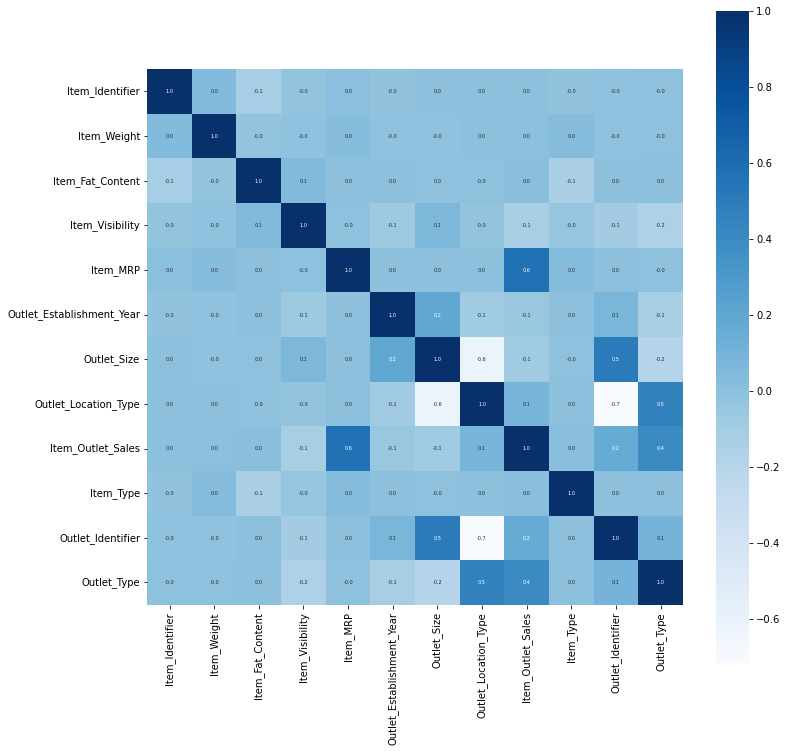

In [49]:
plt.figure(figsize=(12,12))
correlation =df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Blues')
plt.show()


In [50]:
df.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type,Outlet_Identifier,Outlet_Type
0,9.300,0,0.016047,249.8092,1,0,3735.1380,4,9,1
1,5.920,1,0.019278,48.2692,1,2,443.4228,14,3,2
2,17.500,0,0.016760,141.6180,1,0,2097.2700,10,9,1
3,19.200,1,0.000000,182.0950,1,2,732.3800,6,0,0
4,8.930,0,0.000000,53.8614,0,2,994.7052,9,1,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,2778.3834,13,1,1
8519,8.380,1,0.046982,108.1570,1,1,549.2850,0,7,1
8520,10.600,0,0.035186,85.1224,2,1,1193.1136,8,6,1
8521,7.210,1,0.145221,103.1332,1,2,1845.5976,13,3,2


## splitting data to train and test

In [52]:
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Type']]
Y = df['Item_Outlet_Sales']


## scaling covert the data into standard normal

In [53]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

## Modeling

In [55]:
regression_model = LinearRegression()

In [56]:
regression_model.fit(X_train,Y_train)

LinearRegression()

In [62]:
y_test_regression_prediction=regression_model.predict(X_test)

In [63]:
r2_score(Y_test,y_test_regression_prediction)

0.5110194744770145

In [64]:
y_test_regression_prediction

array([2159.48187182, 2803.83748108, 1940.60635189, ..., 2694.10898248,
       2967.46845192, 5521.14520092])

In [65]:
Y_test

4419    1837.6080
2691    1422.1488
158     1701.7848
8005    1910.8460
5090    1895.5326
          ...    
7520    1134.5232
1316    2993.4368
6749    1926.1594
4929    2036.0164
7609    7433.6570
Name: Item_Outlet_Sales, Length: 2554, dtype: float64

In [66]:
print(f"R2 Score: {round(r2_score(Y_test,y_test_regression_prediction), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test,y_test_regression_prediction), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test,y_test_regression_prediction), 2)}")


R2 Score: 0.51
MSE: 1393502.03
MAE: 874.95


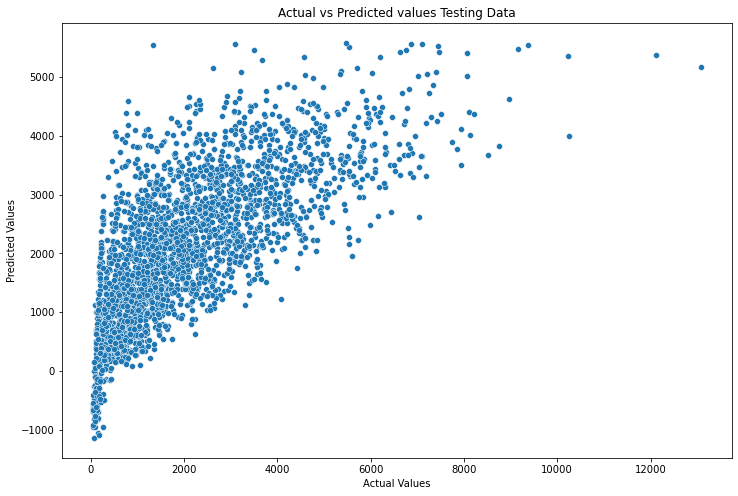

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = Y_test, y =y_test_regression_prediction )
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


## r_2score for traning data set

In [68]:
y_traning_regression_prediction=regression_model.predict(X_train)

In [69]:
r2_score(Y_train,y_traning_regression_prediction)

0.5090334164067862

In [70]:
print(f"R2 Score: {round(r2_score(Y_train,y_traning_regression_prediction), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train,y_traning_regression_prediction), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train,y_traning_regression_prediction), 2)}")

R2 Score: 0.51
MSE: 1441606.22
MAE: 907.67


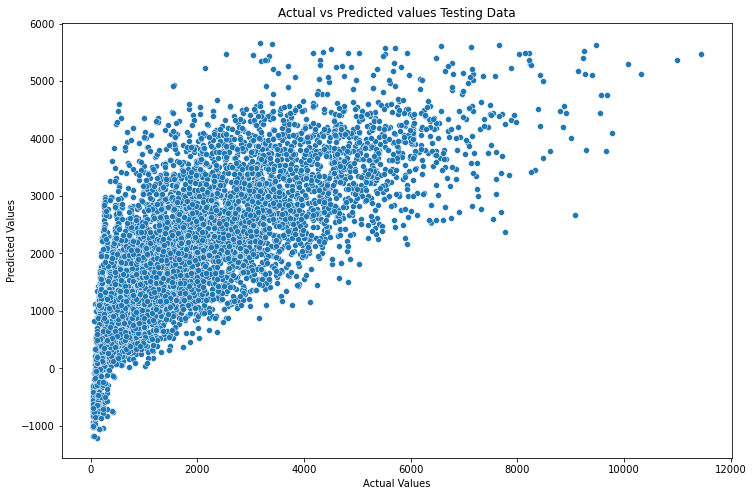

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = Y_train, y =y_traning_regression_prediction )
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [72]:
forest_model=RandomForestRegressor()

In [73]:
forest_model.fit(X_train,Y_train)

RandomForestRegressor()

In [74]:
y_train_pred=forest_model.predict(X_train)

In [75]:
r2_score(Y_train,y_train_pred)

0.937473569339001

In [76]:
print(f"R2 Score: {round(r2_score(Y_train,y_train_pred), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train,y_train_pred), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train,y_train_pred), 2)}")

R2 Score: 0.94
MSE: 183593.94
MAE: 299.23


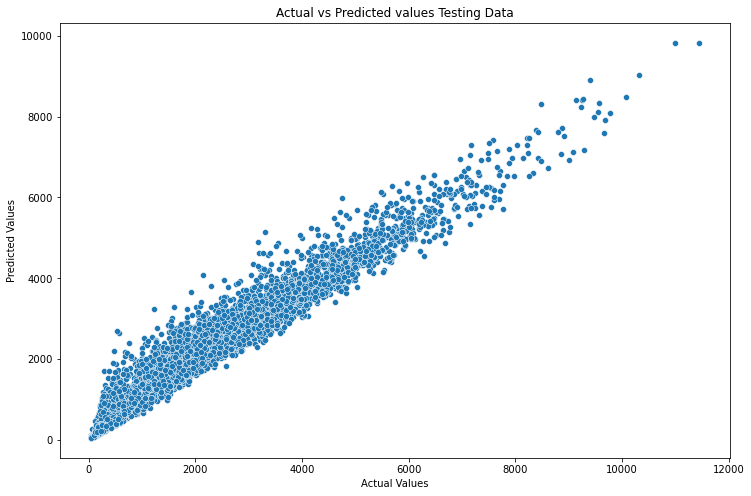

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = Y_train, y =y_train_pred )
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [78]:
y_test_pred=forest_model.predict(X_test)

In [79]:
r2_score(Y_test,y_test_pred)

0.5642894332446466

In [80]:
print(f"R2 Score: {round(r2_score(Y_test,y_test_pred), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test,y_test_pred), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test,y_test_pred), 2)}")

R2 Score: 0.56
MSE: 1241692.72
MAE: 777.02


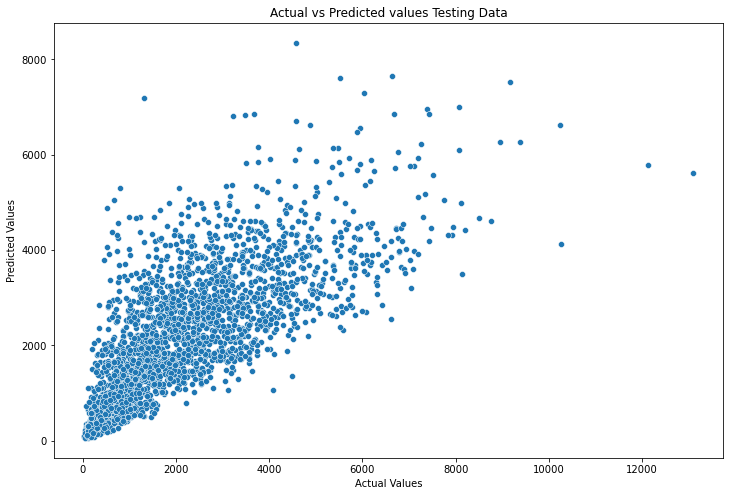

In [81]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = Y_test, y =y_test_pred)
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [82]:
desciontree_model=DecisionTreeRegressor()

In [83]:
desciontree_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [84]:
y_train_prediction=desciontree_model.predict(X_train)

In [85]:
r2_score(Y_train,y_train_prediction)

1.0

In [86]:
print(f"R2 Score: {round(r2_score(Y_train,y_train_prediction), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train,y_train_prediction), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train,y_train_prediction), 2)}")

R2 Score: 1.0
MSE: 0.0
MAE: 0.0


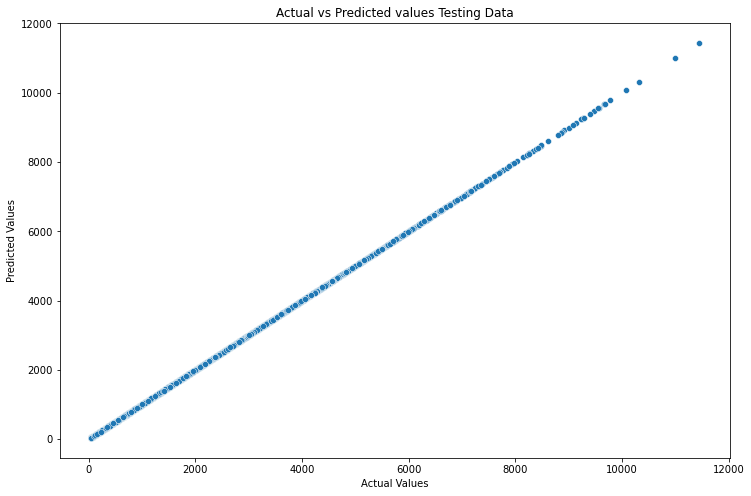

In [87]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = Y_train, y =y_train_prediction)
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [88]:
y_test_prediction=desciontree_model.predict(X_test)

In [89]:
print(f"R2 Score: {round(r2_score(Y_test,y_test_prediction), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test,y_test_prediction), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test,y_test_prediction), 2)}")

R2 Score: 0.19
MSE: 2317253.09
MAE: 1060.19


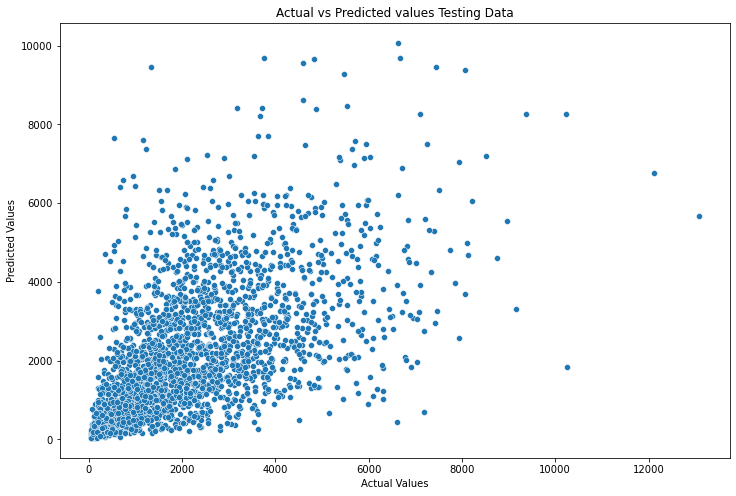

In [90]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = Y_test, y =y_test_prediction)
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## best  r2_score with the help of cross validtion

In [91]:
def r2_score(model,x,y):
    r2_score=cross_val_score(model,x,y,cv=5,scoring='r2')
    return r2_score.max()
     

In [92]:
r2_score(LinearRegression(),X_train,Y_train)

0.5253914331842128

In [93]:
r2_score(RandomForestRegressor(),X_train,Y_train)

0.5622074415984738

In [94]:
r2_score(DecisionTreeRegressor(),X_train,Y_train)

0.15490685856575592

In [ ]:
R2 Score: 0.51
MSE: 1441606.22
MAE: 907.67

## symmary
## scores for both training and test data using  linear Regression model
## for test data
## R2 Score: 0.51
## MSE: 1393502.03
## MAE: 874.95
## for training data
## R2 Score: 0.51
## MSE: 1441606.22
## MAE: 907.67

## scores for both training and test data using  Random forest  model
## for test data
## R2 Score: 0.57
## MSE: 1236967.86
## MAE: 773.59
## for traning data set
## R2 Score: 0.94
## MSE: 187344.84
## MAE: 300.34




## scores for both training and test data using decision tree model
## for test data
## R2 Score: 0.2
## MSE: 2287769.03
## MAE: 1055.89
## for trainig data
## R2 Score: 1.0
## MSE: 0.0
## MAE: 0.0



## We see that our last three models are overfitted on training data, thus the scores are not the best for test data.

In [ ]:
## Happy End